In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text
from matplotlib.patches import Circle
import os
import pickle
from scipy.stats import mannwhitneyu, ttest_ind, kruskal, f_oneway
from statannotations.Annotator import Annotator
from itertools import combinations

# QI, DI and NB incides calculation

In [3]:
df_food = pd.read_csv("df_food_filtered_with_food_group.csv",index_col=0)
with open("df_food_openfoodfacts_merged.pkl", "rb") as f:
    df_food_openfoodfacts = pickle.load(f, encoding="latin1")

C:\Users\Sophie\AppData\Local\Temp\ipykernel_16652\1585345951.py:1: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_food = pd.read_csv("df_food_filtered_with_food_group.csv",index_col=0)


In [4]:
df_food = df_food[df_food["eaten_quantity_in_gram"] > 0]
df_food = df_food[df_food["energy_kcal_eaten"] > 0]

In [5]:

df_food.columns

Index(['food_id', 'barcode', 'dish_id', 'eaten_quantity', 'eaten_unit',
       'subject_key', 'eaten_at', 'eaten_at_utc_offset', 'media_count',
       'food_group_cname', 'type', 'display_name_en', 'display_name_fr',
       'display_name_de', 'fallback_food_id', 'standard_portion_quantity',
       'standard_portion_unit', 'specific_gravity', 'alcohol',
       'all_trans_retinol_equivalents_activity', 'beta_carotene',
       'beta_carotene_activity', 'calcium', 'carbohydrates', 'chloride',
       'cholesterol', 'energy_kcal', 'energy_kj', 'fat',
       'fatty_acids_monounsaturated', 'fatty_acids_polyunsaturated',
       'fatty_acids_saturated', 'fiber', 'folate', 'iodide', 'iron',
       'magnesium', 'niacin', 'pantothenic_acid', 'phosphorus', 'potassium',
       'protein', 'salt', 'sodium', 'starch', 'sugar', 'vitamin_a_activity',
       'vitamin_b1', 'vitamin_b12', 'vitamin_b2', 'vitamin_b6', 'vitamin_c',
       'vitamin_d', 'vitamin_e_activity', 'water', 'zinc',
       'eaten_quantit

In [6]:
df_food[[i for i in df_food.columns if 'eaten' in i]].columns

Index(['eaten_quantity', 'eaten_unit', 'eaten_at', 'eaten_at_utc_offset',
       'eaten_quantity_in_gram', 'energy_kcal_eaten', 'energy_kj_eaten',
       'carb_eaten', 'fat_eaten', 'protein_eaten', 'fiber_eaten',
       'alcohol_eaten', 'local_eaten_at', 'eaten_date',
       'all_trans_retinol_equivalents_activity_eaten', 'beta_carotene_eaten',
       'calcium_eaten', 'cholesterol_eaten',
       'fatty_acids_monounsaturated_eaten',
       'fatty_acids_polyunsaturated_eaten', 'fatty_acids_saturated_eaten',
       'folate_eaten', 'iron_eaten', 'magnesium_eaten', 'niacin_eaten',
       'pantothenic_acid_eaten', 'phosphorus_eaten', 'potassium_eaten',
       'salt_eaten', 'sodium_eaten', 'sugar_eaten', 'vitamin_b1_eaten',
       'vitamin_b12_eaten', 'vitamin_b2_eaten', 'vitamin_b6_eaten',
       'vitamin_c_eaten', 'vitamin_d_eaten', 'vitamin_e_activity_eaten',
       'zinc_eaten'],
      dtype='object')

In [7]:
df_food

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,vitamin_b12_eaten,vitamin_b2_eaten,vitamin_b6_eaten,vitamin_c_eaten,vitamin_d_eaten,vitamin_e_activity_eaten,zinc_eaten,start_date,cohort,food_group
0,13,NaN,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,2.310000e-06,0.000275,0.000154,0.00000,0.000000e+00,0.220,0.004730,2022-02-04,cohort_b,meat_fish_seafood
3,13,NaN,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,2.100000e-06,0.000250,0.000140,0.00000,0.000000e+00,0.200,0.004300,2023-01-10,cohort_b,meat_fish_seafood
4,25,NaN,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,0.000000e+00,0.000010,0.000028,0.00315,0.000000e+00,0.035,0.000035,2021-03-22,cohort_b,fruits
5,25,NaN,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,0.000000e+00,0.000010,0.000028,0.00315,0.000000e+00,0.035,0.000035,2021-10-19,cohort_b,fruits
6,25,NaN,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,0.000000e+00,0.000012,0.000032,0.00360,0.000000e+00,0.040,0.000040,2021-09-10,cohort_b,fruits
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,sweets_desserts
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,sweets_desserts
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,3.800000e-07,0.000210,0.000000,0.00000,7.500000e-07,0.000,0.000000,2023-02-12,cohort_b,yogurt_fresh_dairy
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,0.000000e+00,0.000000,0.000000,0.01200,0.000000e+00,0.000,0.000000,2023-03-01,cohort_b,vegetable_fruit_juices


In [8]:
nutrient_info = {
    'folate_eaten':                                         {'unit': 'mcg', 'target': 400,  'type': 'qualifying'},
    #'niacin_eaten':                                         {'unit': 'mg',  'target': 14,   'type': 'qualifying'},
    #'pantothenic_acid_eaten':                               {'unit': 'mg',  'target': 5,    'type': 'qualifying'},
    #'vitamin_b2_eaten':                                     {'unit': 'mg',  'target': 1.1,  'type': 'qualifying'},
    #'vitamin_b1_eaten':                                     {'unit': 'mg',  'target': 1.2,  'type': 'qualifying'},
    'all_trans_retinol_equivalents_activity_eaten':         {'unit': 'IU',  'target': 700,  'type': 'qualifying'},
    'beta_carotene_eaten':                                  {'unit' : 'mcg','target' : 700, 'type' :'qualifying'},
    #'vitamin_b12_eaten':                                    {'unit': 'mcg', 'target': 2.4,  'type': 'qualifying'},
    #'vitamin_b6_eaten':                                     {'unit': 'mg',  'target': 1.3,  'type': 'qualifying'},
    'vitamin_c_eaten':                                      {'unit': 'mg',  'target': 75,   'type': 'qualifying'},
    'vitamin_d_eaten':                                      {'unit': 'mcg', 'target': 7.5,  'type': 'qualifying'},
    'vitamin_e_activity_eaten':                             {'unit': 'TAE', 'target': 15,    'type': 'qualifying'},
    'calcium_eaten':                                        {'unit': 'mg',  'target': 1000, 'type': 'qualifying'},
    'iron_eaten':                                           {'unit': 'mg',  'target': 18,   'type': 'qualifying'},
    'magnesium_eaten':                                      {'unit': 'mg',  'target': 320,  'type': 'qualifying'},
    'phosphorus_eaten':                                     {'unit': 'mg',  'target': 700,  'type': 'qualifying'},
    'potassium_eaten':                                      {'unit': 'mg',  'target': 4700, 'type': 'qualifying'},
    'zinc_eaten':                                           {'unit': 'mg',  'target': 8,    'type': 'qualifying'},
    'fiber_eaten':                                          {'unit': 'g',   'target': 25,   'type': 'qualifying'},
    'protein_eaten':                                        {'unit': 'g',   'target': 46,   'type': 'qualifying'},
    'fat_eaten':                                            {'unit': 'g',   'target': 78,   'type': 'disqualifying'},
    'fatty_acids_saturated_eaten':                          {'unit': 'g',   'target': 22,   'type': 'disqualifying'},
    'cholesterol_eaten':                                    {'unit': 'mg',  'target': 300,  'type': 'disqualifying'},
    'sugar_eaten':                                          {'unit': 'g',   'target': 125,  'type': 'disqualifying'},
    'sodium_eaten':                                         {'unit': 'mg',  'target': 2400, 'type': 'disqualifying'},
    'salt_eaten' :                                          {'unit' : 'g',  'target': 6,   'type': 'disqualifying'}
}

conversion_factors = {
    "mg": 1000,
    "g": 1,
    "mcg": 1000000,
    "IU": 1,
    "TAE": 1,
}

In [9]:
df_food['beta_carotene_eaten'].describe()

count    317780.000000
mean          0.000147
std           0.000782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000022
max           0.034995
Name: beta_carotene_eaten, dtype: float64

In [10]:
qualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'qualifying'}
disqualifying_nutrients = {nutr: info for nutr, info in nutrient_info.items() if info['type'] == 'disqualifying'}

In [11]:
def scale_for_nbc(df, nutrient_cols, scaling_factor=2000):
    df = df.copy()

    for nutr in nutrient_cols:
        conversion_factor = conversion_factors[nutrient_info[nutr]['unit']]
        #print(conversion_factor)

        df[nutr + "_scaled"] = (
            df[nutr]
            * (scaling_factor / df["energy_kcal_eaten"])
            * conversion_factor
        )
        #if nutr == "beta_carotene_eaten":
            #print(f'df[nutr + "_scaled"] = ({df[nutr]} * ({scaling_factor} / {df["energy_kcal_eaten"]})* {conversion_factor})')

    return df


df_food_scaled = scale_for_nbc(df_food.fillna(0), list(nutrient_info.keys()), scaling_factor=2000)

In [12]:
for i in df_food_scaled.columns :
    print(i)

food_id
barcode
dish_id
eaten_quantity
eaten_unit
subject_key
eaten_at
eaten_at_utc_offset
media_count
food_group_cname
type
display_name_en
display_name_fr
display_name_de
fallback_food_id
standard_portion_quantity
standard_portion_unit
specific_gravity
alcohol
all_trans_retinol_equivalents_activity
beta_carotene
beta_carotene_activity
calcium
carbohydrates
chloride
cholesterol
energy_kcal
energy_kj
fat
fatty_acids_monounsaturated
fatty_acids_polyunsaturated
fatty_acids_saturated
fiber
folate
iodide
iron
magnesium
niacin
pantothenic_acid
phosphorus
potassium
protein
salt
sodium
starch
sugar
vitamin_a_activity
vitamin_b1
vitamin_b12
vitamin_b2
vitamin_b6
vitamin_c
vitamin_d
vitamin_e_activity
water
zinc
eaten_quantity_in_gram
energy_kcal_eaten
energy_kj_eaten
carb_eaten
fat_eaten
protein_eaten
fiber_eaten
alcohol_eaten
local_eaten_at
eaten_date
combined_name
all_trans_retinol_equivalents_activity_eaten
beta_carotene_eaten
calcium_eaten
cholesterol_eaten
fatty_acids_monounsaturated_eate

In [13]:
#good_df = pd.read_csv('t.csv',sep =',')
#good_df

In [14]:
df_food_scaled[[i for i in df_food_scaled if 'scaled' in i]].columns

Index(['folate_eaten_scaled',
       'all_trans_retinol_equivalents_activity_eaten_scaled',
       'beta_carotene_eaten_scaled', 'vitamin_c_eaten_scaled',
       'vitamin_d_eaten_scaled', 'vitamin_e_activity_eaten_scaled',
       'calcium_eaten_scaled', 'iron_eaten_scaled', 'magnesium_eaten_scaled',
       'phosphorus_eaten_scaled', 'potassium_eaten_scaled',
       'zinc_eaten_scaled', 'fiber_eaten_scaled', 'protein_eaten_scaled',
       'fat_eaten_scaled', 'fatty_acids_saturated_eaten_scaled',
       'cholesterol_eaten_scaled', 'sugar_eaten_scaled', 'sodium_eaten_scaled',
       'salt_eaten_scaled'],
      dtype='object')

In [15]:
def calculate_qi_ratios(row, nutrient_cols):

    qi_ratios = {}
    for nutr in nutrient_cols:
        qi_ratios[nutr + "_ratio"] = row[nutr + '_scaled'] / nutrient_info[nutr]['target']

    qi_ratios["QI"] = np.sum([i for i in qi_ratios.values()]) / len(nutrient_cols)
    
    #qi_ratios["QI"] = np.median([i for i in qi_ratios.values()])

    qi_ratios["combined_name"] = row["combined_name"]
    qi_ratios["food_group"] = row["food_group"]
    qi_ratios["energy_kcal_eaten"] = row["energy_kcal_eaten"]
    qi_ratios["eaten_quantity_in_gram"] = row["eaten_quantity_in_gram"]

    return qi_ratios

In [16]:
def calculate_di_ratios(row, nutrient_cols):

    di_ratios = {}
    for nutr in nutrient_cols:
        di_ratios[nutr + "_ratio"] = row[nutr + '_scaled'] / nutrient_info[nutr]['target']

    di_ratios["DI"] = np.sum([i for i in di_ratios.values()]) / len(nutrient_cols)    

    #di_ratios["DI"] = np.median([i for i in di_ratios.values()])

    di_ratios["combined_name"] = row["combined_name"]
    di_ratios["food_group"] = row["food_group"]
    #di_ratios["energy_kcal_eaten"] = row["energy_kcal_eaten"]
    #di_ratios["eaten_quantity_in_gram"] = row["eaten_quantity_in_gram"]

    return di_ratios

In [17]:
def calculate_nb(row, nutrient_cols):
    
    qi = calculate_qi_ratios(row, nutrient_cols)
    
    nb_ratios = {}
    
    for nutrient in nutrient_cols:
      nb_ratios[nutrient + '_truncated'] = min(qi[nutrient + '_ratio'], 1)

    
    nb_ratios["NB"] = np.sum([i for i in nb_ratios.values()]) / len(nutrient_cols) * 100
    #nb_ratios['NB'] = np.median([i for i in nb_ratios.values()]) * 100

    nb_ratios["combined_name"] = qi["combined_name"]
    nb_ratios["food_group"] = qi["food_group"]
    #nb_ratios["energy_kcal_eaten"] = qi["energy_kcal_eaten"]
    #nb_ratios["eaten_quantity_in_gram"] = qi["eaten_quantity_in_gram"]


    return nb_ratios

In [18]:
qi_ratios = df_food_scaled.apply(calculate_qi_ratios, axis=1, nutrient_cols=qualifying_nutrients)

qi_ratios = qi_ratios.apply(pd.Series)

qi_ratios 


,folate_eaten_ratio,all_trans_retinol_equivalents_activity_eaten_ratio,beta_carotene_eaten_ratio,vitamin_c_eaten_ratio,vitamin_d_eaten_ratio,vitamin_e_activity_eaten_ratio,calcium_eaten_ratio,iron_eaten_ratio,magnesium_eaten_ratio,phosphorus_eaten_ratio,potassium_eaten_ratio,zinc_eaten_ratio,fiber_eaten_ratio,protein_eaten_ratio,QI,combined_name,food_group,energy_kcal_eaten,eaten_quantity_in_gram
0,0.872483,0.230105,0.095877,0.000000,0.000000,0.178971,0.187919,1.789709,1.300336,4.218600,0.856776,7.214765,0.000000,7.936971,1.777322,"Lamb, filet, pan fried, medium, without additi...",meat_fish_seafood,163.90,110.0
3,0.872483,0.230105,0.095877,0.000000,0.000000,0.178971,0.187919,1.789709,1.300336,4.218600,0.856776,7.214765,0.000000,7.936971,1.777322,"Lamb, filet, pan fried, medium, without additi...",meat_fish_seafood,149.00,100.0
4,0.686275,0.000000,0.000000,4.705882,0.000000,0.261438,0.549020,0.653595,1.838235,0.616246,1.084689,0.490196,2.196078,0.341006,0.958761,"Pineapple, unsweetened, canned",fruits,17.85,35.0
5,0.686275,0.000000,0.000000,4.705882,0.000000,0.261438,0.549020,0.653595,1.838235,0.616246,1.084689,0.490196,2.196078,0.341006,0.958761,"Pineapple, unsweetened, canned",fruits,17.85,35.0
6,0.686275,0.000000,0.000000,4.705882,0.000000,0.261438,0.549020,0.653595,1.838235,0.616246,1.084689,0.490196,2.196078,0.341006,0.958761,"Pineapple, unsweetened, canned",fruits,20.40,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.886544,0.917747,0.128878,Alnatura - Kakao Knusper Reis,sweets_desserts,60.64,16.0
514956,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.886544,0.917747,0.128878,Alnatura - Kakao Knusper Reis,sweets_desserts,60.64,16.0
514957,0.000000,0.000000,0.000000,0.000000,2.739726,0.000000,3.287671,0.000000,0.000000,0.000000,0.000000,0.000000,1.315068,2.144133,0.677614,alpro - Joghurt (Heidelbeere),yogurt_fresh_dairy,73.00,100.0
514958,0.000000,0.000000,0.000000,14.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.185771,1.123659,Biotta Sauerkraut,vegetable_fruit_juices,22.00,100.0


In [19]:
di_ratios = df_food_scaled.apply(calculate_di_ratios, axis=1, nutrient_cols=disqualifying_nutrients)

di_ratios = di_ratios.apply(pd.Series)

In [20]:
nb_ratios = df_food_scaled.apply(calculate_nb, axis=1, nutrient_cols=qualifying_nutrients)

nb_ratios = nb_ratios.apply(pd.Series)

In [21]:
df_food_scaled['QI'] = qi_ratios['QI']
df_food_scaled['DI'] = di_ratios['DI']
df_food_scaled['NB'] = nb_ratios['NB']


In [22]:
df_food_scaled[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

,QI,DI,NB
food_group,,,
sweetened_beverages,0.000000,0.664300,0.000000
alcoholic_beverages,0.054467,0.007668,5.446727
sweets_desserts,0.120097,0.852030,10.399704
others,0.137120,0.666667,7.763975
soups_sauces_condiments,0.167945,1.068889,9.146464
salty_snacks,0.171260,0.535766,14.285714
cooked_grains_pasta,0.193661,0.517566,13.369963
vegetable_oils,0.351245,0.694173,9.493173
cereal_grains_starches,0.371371,0.772625,35.603925


In [23]:
qi_ratios.sort_values('QI', ascending=False)[['QI', 'combined_name']].drop_duplicates('combined_name').head(30)

,QI,combined_name
465824,328.057851,Bourquin Nutrition - Spirulina BIO
490676,64.428777,Bio Delikat - Bio Johannisbrot Schoten
477855,56.004199,La Costeña Salsa Verde
4730,55.004716,"Spinach, raw"
484236,55.004716,Epinards
4428,51.971537,"Chicory, steamed, without addition of salt"
27010,49.595014,Cress
4547,47.973909,"Spinach, steamed, without addition of salt"
463797,45.238198,Coop Naturaplan Grated carrot
472765,45.238198,Bio Karotten Schweizer


In [24]:
name = 'Carrot (old variety, white)'
qi_ratios[qi_ratios['combined_name']== name].describe().T


,count,mean,std,min,25%,50%,75%,max
folate_eaten_ratio,7.0,2.439024,3.625973e-16,2.439024,2.439024,2.439024,2.439024,2.439024
all_trans_retinol_equivalents_activity_eaten_ratio,7.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
beta_carotene_eaten_ratio,7.0,487.735192,1.011536e-13,487.735192,487.735192,487.735192,487.735192,487.735192
vitamin_c_eaten_ratio,7.0,2.146341,0.000000e+00,2.146341,2.146341,2.146341,2.146341,2.146341
vitamin_d_eaten_ratio,7.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
vitamin_e_activity_eaten_ratio,7.0,1.821138,4.251830e-16,1.821138,1.821138,1.821138,1.821138,1.821138
calcium_eaten_ratio,7.0,1.609756,2.398356e-16,1.609756,1.609756,1.609756,1.609756,1.609756
iron_eaten_ratio,7.0,0.542005,1.110223e-16,0.542005,0.542005,0.542005,0.542005,0.542005
magnesium_eaten_ratio,7.0,1.204268,2.220446e-16,1.204268,1.204268,1.204268,1.204268,1.204268
phosphorus_eaten_ratio,7.0,1.881533,3.951313e-16,1.881533,1.881533,1.881533,1.881533,1.881533


In [25]:
df_food[df_food['combined_name'] == name].describe().T

,count,mean,std,min,25%,50%,75%,max
food_id,7.0,1079.000000,0.000000,1079.000000,1079.000000,1079.00000,1079.00000,1079.000000
dish_id,7.0,128770.857143,151866.858799,6763.000000,10490.500000,89162.00000,219170.00000,346150.000000
eaten_quantity,7.0,77.142857,29.840848,30.000000,70.000000,80.00000,80.00000,130.000000
eaten_at_utc_offset,7.0,60.000000,0.000000,60.000000,60.000000,60.00000,60.00000,60.000000
media_count,7.0,1.000000,0.000000,1.000000,1.000000,1.00000,1.00000,1.000000
...,...,...,...,...,...,...,...,...
vitamin_b6_eaten,7.0,0.000116,0.000045,0.000045,0.000105,0.00012,0.00012,0.000195
vitamin_c_eaten,7.0,0.002546,0.000985,0.000990,0.002310,0.00264,0.00264,0.004290
vitamin_d_eaten,7.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
vitamin_e_activity_eaten,7.0,0.432000,0.167109,0.168000,0.392000,0.44800,0.44800,0.728000


In [26]:
df_food_scaled[df_food_scaled['combined_name'] == name].describe().T.loc['beta_carotene_eaten_scaled'].values[1]

np.float64(341414.6341463415)

In [27]:
a = qi_ratios[qi_ratios['combined_name']== name].describe().T

a[a.index.isin([i for i in a.index if "_ratio" in i and "iron" not in i])]["mean"].sum() / len(a)

np.float64(29.859810047301337)

In [28]:
df_food_scaled[df_food_scaled['combined_name'] == name].describe().T.loc['beta_carotene_eaten_scaled'].values[1]

np.float64(341414.6341463415)

## Milk subgroups

In [29]:
for i in df_food[df_food['food_group'] == 'milk'].drop_duplicates('combined_name')['combined_name']:
    print(i)

Milk, ewe's, raw
Milk, goat
Milk, whole, powder
Skimmed milk
Milk
Lactose-free milk
Milk drink
Whole milk / unskimmed milk
Buttermilk
Coconut milk
Rice milk
Soya drink (soy milk)
Rice, milk
Alnatura Maudel Drink ungesüsst
Isola Bio Rice
Oat milk
Emmi ENERGY MILK NEW 26g HIGH PROTEIN Vanilla
Vanillemilch aus Milch
Naturaplan : Drink : Teilentrahmte Milch
Coop Mountain milk from the Friborg Pre-Alps
Almond drink (almond milk)
Emmi good day Milky drink
Cremo - Milch UHT
Milchmischerzeugnis aus Vollmilch
Cailler Milch
Coop naturaplan Reisgetränk Haselnuss
Coop : Freeform : Milch : Lactosefrei
Sojasun Schokolade
Coop - Drink Semi-skimmed milk, 1.5% milkfat
Sojasun Boisson de soja Nature
Coop : Karma : Bio Oat Drink Vegan
Alnatura - Coco drink natur
Sojasun Natural
Kondensmilch, gezuckert
VALFLORA : Homogenisiert Halbentrahmte Milch
freefrom Milch
ALNATURA - coconut nature vegan
Partially skimmed milk 2.5% fat
Migros Bio UHT Milch
Sojasun - Soja & Amande
MIGROS : AHA : Milch halbentrahmt lak

In [30]:
milk_catergories = {
    'vegan_milk' : [
        'soy', 'soja',
        'rice', 'riz', 'reis',
        'almond', 'amande', 'mandel',
        'coconut'

    ]
}

In [31]:
def create_milk_subgroup(name):
    name_lower = name.lower()

    for subgroup, keywords in milk_catergories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'dairy_milk'

In [32]:
df_milk = df_food_scaled[df_food_scaled['food_group'] == 'milk'].copy()
df_milk['milk_subgroup'] = df_milk['combined_name'].apply(create_milk_subgroup)
df_milk
print(df_milk['milk_subgroup'].value_counts())

milk_subgroup
dairy_milk    5523
vegan_milk    1871
Name: count, dtype: int64


In [33]:
df_milk.groupby('milk_subgroup')[['QI', 'DI', 'NB']].mean()

,QI,DI,NB
milk_subgroup,,,
dairy_milk,0.989652,1.135514,50.176524
vegan_milk,0.458602,0.865403,18.527796


## Vegetables subgroup

In [34]:
vegetable_categories = {
    'root_vegetables': [
        'carrot', 'carotte', 'karotte', 'möhre',
        'beetroot', 'betterave', 'rote bete', 'rübe',
        'turnip', 'navet', 'steckrübe',
        'parsnip', 'panais', 'pastinake',
        'celeriac', 'céleri-rave', 'knollensellerie',
        #'onion', 'oignon', 'zwiebel',
        'radish', 'radis', 'radieschen',
        #'fennel', 'fenouil', 'fenchel',
        'potato', 'pomme de terre', 'kartoffel'
    ],
    'leafy_vegetables': [
        'spinach', 'épinard', 'spinat',
        'beet', 'blette', 'mangold',
        'chicory', 'chicorée',
        'endive', 'endivie',
        'lettuce', 'laitue', 'kopfsalat', 'salat',
        'kale', 'chou frisé', 'grünkohl',
        'cabbage', 'chou', 'kohl',
        'rocket', 'roquette', 'rucola',
        'arugula', 
        'mustard', 'moutarde', 'senf'
    ],
    'fruity_vegetables': [
        'avocado', 'avocat',
        #'asparagus', 'asperge', 'spargel',
        'cucumber', 'cucumbers', 'concombre',
        'eggplant', 'aubergine',
        'olive',  
        'pea', 'peas', 'pois', 'erbse', 'erbsen',
        #'maïs', 'mais',
        'tomato', 'tomate',
        'pepper', 'poivron', 'paprika',
        'squash', 'courge', 'kürbis',
        'zucchini', 'courgette'
    ],
    'pickled_vegetables' : [
        'cornichon', 'chirat',
        'pickled', 'mariné', 'eingelegt'

    ]
}


In [35]:
def create_vegetables_subgroup(name):
    name_lower = name.lower()
    for subgroup, keywords in vegetable_categories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'other_vegetables'

In [36]:
df_vegetables = df_food_scaled[df_food_scaled['food_group']=='vegetables'].copy()
df_vegetables['vegetable_subgroup'] = df_vegetables['combined_name'].apply(create_vegetables_subgroup)
df_vegetables
print(df_vegetables['vegetable_subgroup'].value_counts())

vegetable_subgroup
other_vegetables      22384
fruity_vegetables     14420
root_vegetables        6959
leafy_vegetables       3721
pickled_vegetables       83
Name: count, dtype: int64


In [37]:
for i in df_vegetables.columns :
    print(i)

food_id
barcode
dish_id
eaten_quantity
eaten_unit
subject_key
eaten_at
eaten_at_utc_offset
media_count
food_group_cname
type
display_name_en
display_name_fr
display_name_de
fallback_food_id
standard_portion_quantity
standard_portion_unit
specific_gravity
alcohol
all_trans_retinol_equivalents_activity
beta_carotene
beta_carotene_activity
calcium
carbohydrates
chloride
cholesterol
energy_kcal
energy_kj
fat
fatty_acids_monounsaturated
fatty_acids_polyunsaturated
fatty_acids_saturated
fiber
folate
iodide
iron
magnesium
niacin
pantothenic_acid
phosphorus
potassium
protein
salt
sodium
starch
sugar
vitamin_a_activity
vitamin_b1
vitamin_b12
vitamin_b2
vitamin_b6
vitamin_c
vitamin_d
vitamin_e_activity
water
zinc
eaten_quantity_in_gram
energy_kcal_eaten
energy_kj_eaten
carb_eaten
fat_eaten
protein_eaten
fiber_eaten
alcohol_eaten
local_eaten_at
eaten_date
combined_name
all_trans_retinol_equivalents_activity_eaten
beta_carotene_eaten
calcium_eaten
cholesterol_eaten
fatty_acids_monounsaturated_eate

In [38]:
df_vegetables[['QI', 'DI', 'NB', 'vegetable_subgroup']].groupby('vegetable_subgroup').median(numeric_only=True).sort_values('QI')

,QI,DI,NB
vegetable_subgroup,,,
pickled_vegetables,1.211960,0.140400,66.349519
other_vegetables,5.319198,0.417521,82.712215
leafy_vegetables,6.144406,0.415157,85.714286
fruity_vegetables,7.527321,0.477981,84.353741
root_vegetables,39.209308,0.731399,79.700156


In [39]:
df_vegetables.describe()

,food_id,dish_id,eaten_quantity,eaten_at_utc_offset,media_count,fallback_food_id,standard_portion_quantity,specific_gravity,alcohol,all_trans_retinol_equivalents_activity,...,protein_eaten_scaled,fat_eaten_scaled,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled,QI,DI,NB
count,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000,47567.0,47567.0,47567.000000,...,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000,47567.000000
mean,1199.887275,210520.485147,62.350138,94.933883,0.927639,11.157021,83.145752,0.0,0.0,0.228436,...,112.412855,28.296784,2.534937,29.243093,204.494865,4456.751304,8.706659,12.356428,0.919922,71.949412
std,1621.924597,124948.440282,52.922142,37.414767,0.259088,125.773333,46.694152,0.0,0.0,3.578734,...,60.727150,29.824093,7.342976,315.446922,118.819127,14961.226649,35.782536,13.022801,2.007584,23.589952
min,50.000000,655.000000,0.125000,-420.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1040.000000,107055.500000,25.000000,60.000000,1.000000,0.000000,40.000000,0.0,0.0,0.000000,...,69.565217,15.384615,0.000000,0.000000,137.254902,152.380952,0.000000,2.058332,0.361079,70.600414
50%,1069.000000,200854.000000,50.000000,120.000000,1.000000,0.000000,80.000000,0.0,0.0,0.000000,...,93.333333,25.000000,0.000000,0.000000,200.000000,444.444444,0.000000,7.064720,0.475585,82.589286
75%,1085.000000,333566.000000,80.000000,120.000000,1.000000,0.000000,120.000000,0.0,0.0,0.000000,...,177.777778,30.303030,3.174603,0.000000,304.761905,2000.000000,3.636364,22.502923,0.610122,85.714286
max,46296.000000,428290.000000,800.000000,240.000000,1.000000,5606.000000,306.000000,0.0,0.0,166.000000,...,368.421053,227.272727,175.000000,3625.000000,473.684211,140000.000000,720.000000,55.004716,30.826807,100.000000


In [40]:
df_vegetables[df_vegetables['combined_name'] == 'Epinards'][[i for i in df_vegetables.columns if '_eaten_scaled' in i]]

,folate_eaten_scaled,all_trans_retinol_equivalents_activity_eaten_scaled,beta_carotene_eaten_scaled,vitamin_c_eaten_scaled,vitamin_d_eaten_scaled,vitamin_e_activity_eaten_scaled,calcium_eaten_scaled,iron_eaten_scaled,magnesium_eaten_scaled,phosphorus_eaten_scaled,potassium_eaten_scaled,zinc_eaten_scaled,fiber_eaten_scaled,protein_eaten_scaled,fat_eaten_scaled,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled
484235,16521.73913,0.0,418260.869565,3478.26087,0.0,156.521739,8695.652174,234.782609,5043.478261,4521.73913,46086.956522,52.173913,226.086957,234.782609,34.782609,8.695652,0.0,60.869565,5652.173913,0.0
484236,16521.73913,0.0,418260.869565,3478.26087,0.0,156.521739,8695.652174,234.782609,5043.478261,4521.73913,46086.956522,52.173913,226.086957,234.782609,34.782609,8.695652,0.0,60.869565,5652.173913,0.0


In [41]:
df_food_scaled[df_food_scaled['combined_name'] == 'Epinards']

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,protein_eaten_scaled,fat_eaten_scaled,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled,QI,DI,NB
484235,8436,7617027876896,80922,50.0,g,9hfx6d,2019-11-21 11:50:28,60,0,vegetables_fruits,...,234.782609,34.782609,8.695652,0.0,60.869565,5652.173913,0.0,55.004716,0.613869,85.714286
484236,8436,7617027876896,80671,50.0,g,9hfx6d,2019-11-20 11:07:35,60,0,vegetables_fruits,...,234.782609,34.782609,8.695652,0.0,60.869565,5652.173913,0.0,55.004716,0.613869,85.714286


## Yogurt and fresh dairy subgroup

In [42]:
for i in df_food[df_food['food_group'] == 'yogurt_fresh_dairy'].drop_duplicates('combined_name')['combined_name']:
    print(i)

Curds, natural, min. 40% fidm
Curds, natural, with at most 10% fidm
Curds, natural, min. 20% fidm
Yaourt, yahourt, yogourt ou yoghourt, vanilla
Yaourt, yahourt, yogourt ou yoghourt, mocca
Yaourt, yahourt, yogourt ou yoghourt, chocolate
Yaourt, yahourt, yogourt ou yoghourt, strawberry
Yaourt, yahourt, yogourt ou yoghourt, flavored, low fat, with sweetener
Yaourt, yahourt, yogourt ou yoghourt, Bifidus, plain
Yaourt, yahourt, yogourt ou yoghourt, natural, low fat
Actimel
Yoghurt drink
Kefir drink
Soya Yaourt, yahourt, yogourt ou yoghourt
Activia
Yaourt, yahourt, yogourt ou yoghourt, sweetened, (average)
Kefir yoghurt
Cottage cheese
Petit-Suisse
Curd
coop naturaplan Jogurt Vanilla
coop naturaplan Griechischer Jogurt Nature
coop naturaplan  Griechischer Jogurt Nature
Milco: Yogourt au lait de la Gruyère
Naturaplan : Jogurt : Haselnuss
Greek Yaourt, yahourt, yogourt ou yoghourt
Soja Line Soyog Mango
Coop Qualité & Prix Half fat cottage cheese
Coop Jogurt à la Grecque
Léger Joghurt Nature
Els

In [43]:
yogurt_categories = {
    'plain_yogurt' : [
        'natural', 'nature', 'plain',
        'curd', 'fromage blanc', 'hüttenkäse',
        'c,ottage', 'caillé' 
    ],
    'flavored_yogurt' : [
        'vanilla', 'vanille',
        'strawberry', 'fraise', 'erdbeere',
        'chocolate', 'schokolade', 
        'mocca',
        'blueberry', 'myrtille', 'blaubeere',
        'rasberry', 'framboise', 'himbeere',
        'mango', ',mangue'
    ],
    'greek_yogurt' : [
        'greek', 'grec', 'griechisch',
        'skyr',
        'icelandic', 'islandais', 'isländisch'
    ],
    'yogurt_drink' : [
        'drink', 'boisson', 'getränlk',
        'kefir'
    ]
}

In [44]:
def create_yogurt_subgroup(name):
    name_lower = name.lower()
    for subgroup, keywords in yogurt_categories.items():
        if any(keyword in name_lower for keyword in keywords):
            return subgroup
    return 'other_yogurt'

In [45]:
df_yogurt = df_food_scaled[df_food_scaled['food_group']=='yogurt_fresh_dairy'].copy()
df_yogurt['yogurt_subgroup'] = df_yogurt['combined_name'].apply(create_yogurt_subgroup)
df_yogurt
print(df_yogurt['yogurt_subgroup'].value_counts())

yogurt_subgroup
plain_yogurt       2420
other_yogurt       2005
greek_yogurt        553
flavored_yogurt     494
yogurt_drink        312
Name: count, dtype: int64


In [46]:
df_yogurt.groupby('yogurt_subgroup')[['QI', 'DI', 'NB']].median(numeric_only=True)

,QI,DI,NB
yogurt_subgroup,,,
flavored_yogurt,0.838491,0.877589,52.569944
greek_yogurt,1.333872,1.070352,48.155154
other_yogurt,0.867106,0.955559,54.839881
plain_yogurt,1.394111,1.208269,68.372501
yogurt_drink,0.248447,0.857001,7.142857


In [47]:
for i in  df_food_scaled.columns : 
    print(i)

food_id
barcode
dish_id
eaten_quantity
eaten_unit
subject_key
eaten_at
eaten_at_utc_offset
media_count
food_group_cname
type
display_name_en
display_name_fr
display_name_de
fallback_food_id
standard_portion_quantity
standard_portion_unit
specific_gravity
alcohol
all_trans_retinol_equivalents_activity
beta_carotene
beta_carotene_activity
calcium
carbohydrates
chloride
cholesterol
energy_kcal
energy_kj
fat
fatty_acids_monounsaturated
fatty_acids_polyunsaturated
fatty_acids_saturated
fiber
folate
iodide
iron
magnesium
niacin
pantothenic_acid
phosphorus
potassium
protein
salt
sodium
starch
sugar
vitamin_a_activity
vitamin_b1
vitamin_b12
vitamin_b2
vitamin_b6
vitamin_c
vitamin_d
vitamin_e_activity
water
zinc
eaten_quantity_in_gram
energy_kcal_eaten
energy_kj_eaten
carb_eaten
fat_eaten
protein_eaten
fiber_eaten
alcohol_eaten
local_eaten_at
eaten_date
combined_name
all_trans_retinol_equivalents_activity_eaten
beta_carotene_eaten
calcium_eaten
cholesterol_eaten
fatty_acids_monounsaturated_eate

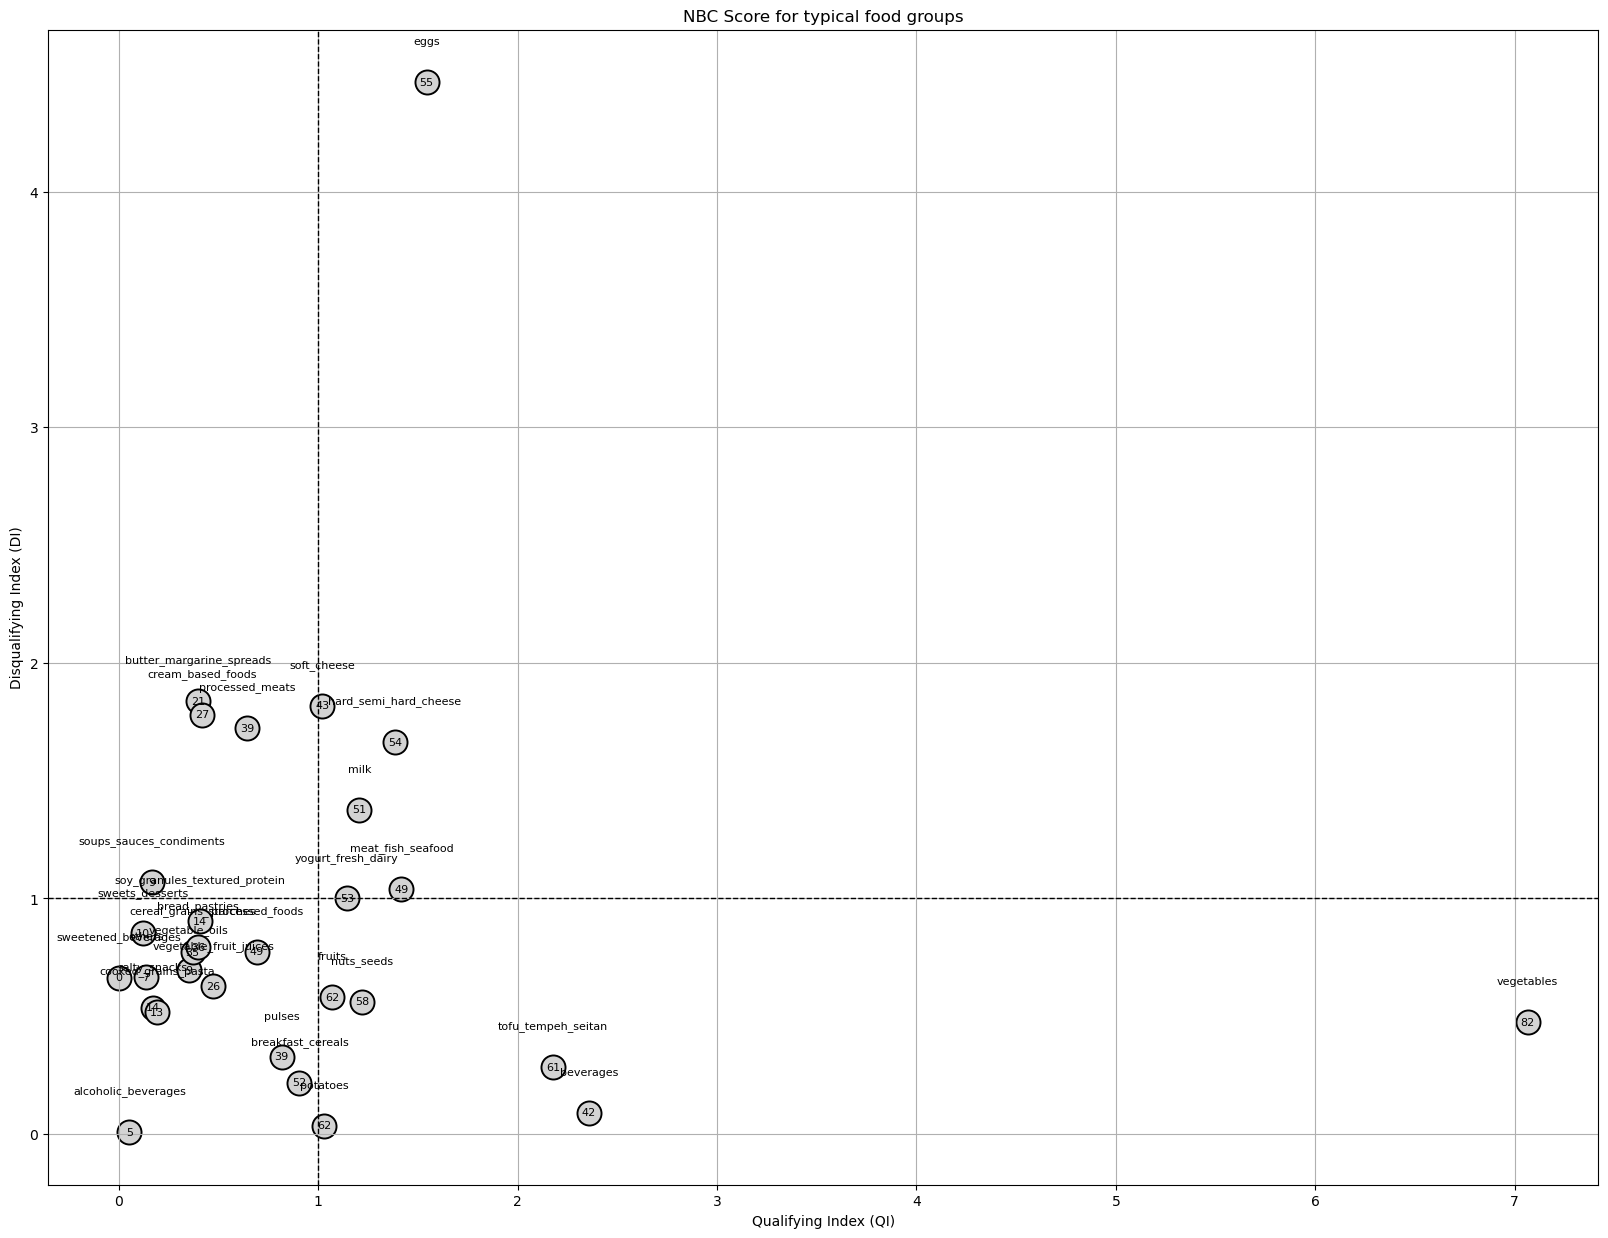

In [48]:
plt.figure(figsize=(20, 15))

data = df_food_scaled[['QI', 'DI', 'NB', 'combined_name', 'food_group']].groupby('food_group').median(numeric_only=True).sort_values('QI')

ax = sns.scatterplot(data=data, x='QI',y='DI',s=300,color='lightgray',edgecolor='black')

for i, row in data.iterrows():

    x = row['QI']
    y = row['DI']
    nb_values = row['NB']

    plt.text(x, y, f"{int(nb_values)}", ha='center', va='center', fontsize=8, zorder=10)

    plt.text(x, y + 0.15, i ,ha='center', va='bottom',fontsize=8, color='black', zorder=10)


plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
plt.xlabel('Qualifying Index (QI)')
plt.ylabel('Disqualifying Index (DI)')
plt.title('NBC Score for typical food groups')
plt.grid()
plt.show()


In [49]:
df_food_scaled

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,protein_eaten_scaled,fat_eaten_scaled,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled,QI,DI,NB
0,13,0,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,365.100671,60.402685,22.818792,1181.208054,0.000000,1033.557047,0.000000,1.777322,1.029937,53.015229
3,13,0,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,365.100671,60.402685,22.818792,1181.208054,0.000000,1033.557047,0.000000,1.777322,1.029937,53.015229
4,25,0,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,15.686275,7.843137,0.000000,0.000000,443.137255,78.431373,0.000000,0.958761,0.613055,54.269824
5,25,0,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,15.686275,7.843137,0.000000,0.000000,443.137255,78.431373,0.000000,0.958761,0.613055,54.269824
6,25,0,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,15.686275,7.843137,0.000000,0.000000,443.137255,78.431373,0.000000,0.958761,0.613055,54.269824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,42.216359,15.831135,5.804749,0.000000,79.155673,0.000000,0.158311,0.128878,0.187741,12.887789
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,42.216359,15.831135,5.804749,0.000000,79.155673,0.000000,0.158311,0.128878,0.187741,12.887789
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,98.630137,54.794521,8.219178,0.000000,257.534247,0.000000,5.753425,0.677614,0.682545,28.571429
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,54.545455,0.000000,0.000000,0.000000,363.636364,0.000000,90.909091,1.123659,3.010101,14.285714


# Classification of food into meals

In [50]:
df_food_scaled.groupby(["subject_key", "eaten_at"])["combined_name"].value_counts()

subject_key   eaten_at             combined_name                                  
02ae3856ca04  2018-11-26 07:20:04  Coffee, with caffeine                              1
              2018-11-26 07:47:34  Corn Flakes                                        1
                                   Honey n.s.                                         1
                                   Yaourt, yahourt, yogourt ou yoghourt, natural      1
              2018-11-26 08:56:24  Banana                                             1
                                                                                     ..
zznk4w        2022-09-25 06:11:19  Tomato, raw                                        1
              2022-09-25 09:19:35  Coffee, with caffeine                              1
                                   Oat milk                                           1
              2022-09-25 10:24:40  Porridge, prepared, with partially skimmed milk    1
              2022-09-25 10:36:35  Ca

In [51]:
def classify_meal_time(eaten_at):
    hour = eaten_at.hour

    if 5 <= hour < 11 :
        return 'breakfast'
    elif 11 <= hour < 16 :
        return 'lunch'
    else :
        return 'dinner'

In [52]:
df_food_scaled['eaten_at'] = pd.to_datetime(df_food_scaled['eaten_at'])
df_food_scaled['date'] = pd.to_datetime(df_food_scaled['eaten_at']).dt.date
df_food_scaled['meal'] = df_food_scaled['eaten_at'].apply(classify_meal_time)
df_food_scaled

,food_id,barcode,dish_id,eaten_quantity,eaten_unit,subject_key,eaten_at,eaten_at_utc_offset,media_count,food_group_cname,...,fatty_acids_saturated_eaten_scaled,cholesterol_eaten_scaled,sugar_eaten_scaled,sodium_eaten_scaled,salt_eaten_scaled,QI,DI,NB,date,meal
0,13,0,335994,110.00,g,bjsqab,2022-02-15 18:06:27,60,1,dairy_products_meat_fish_eggs_tofu,...,22.818792,1181.208054,0.000000,1033.557047,0.000000,1.777322,1.029937,53.015229,2022-02-15,dinner
3,13,0,411384,100.00,g,erv9jd,2023-01-18 13:08:53,60,1,dairy_products_meat_fish_eggs_tofu,...,22.818792,1181.208054,0.000000,1033.557047,0.000000,1.777322,1.029937,53.015229,2023-01-18,lunch
4,25,0,202497,35.00,g,6ata8r,2021-03-30 13:52:23,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,0.958761,0.613055,54.269824,2021-03-30,lunch
5,25,0,283397,35.00,g,uzbc9s,2021-10-21 10:09:09,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,0.958761,0.613055,54.269824,2021-10-21,breakfast
6,25,0,266679,40.00,g,fvh6kf,2021-09-19 10:14:35,120,1,vegetables_fruits,...,0.000000,0.000000,443.137255,78.431373,0.000000,0.958761,0.613055,54.269824,2021-09-19,breakfast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514955,46573,4104420237155,426463,16.00,g,pgeyqb,2023-03-13 15:16:39,60,0,unclassified,...,5.804749,0.000000,79.155673,0.000000,0.158311,0.128878,0.187741,12.887789,2023-03-13,lunch
514956,46573,4104420237155,426838,16.00,g,pgeyqb,2023-03-13 15:30:54,60,0,unclassified,...,5.804749,0.000000,79.155673,0.000000,0.158311,0.128878,0.187741,12.887789,2023-03-13,lunch
514957,46575,5411188102809,423445,100.00,g,kmxhmz,2023-02-25 08:18:11,60,1,unclassified,...,8.219178,0.000000,257.534247,0.000000,5.753425,0.677614,0.682545,28.571429,2023-02-25,breakfast
514958,46588,7618500940806,425332,100.00,ml,pgeyqb,2023-03-06 18:31:08,60,1,unclassified,...,0.000000,0.000000,363.636364,0.000000,90.909091,1.123659,3.010101,14.285714,2023-03-06,dinner


In [53]:
df_food_scaled.groupby(['subject_key', 'meal','energy_kcal_eaten', 'date', 'QI', 'DI', 'NB'])['combined_name'].value_counts()

subject_key   meal       energy_kcal_eaten  date        QI        DI        NB         combined_name                     
02ae3856ca04  breakfast  2.00               2018-11-26  2.358452  0.090278  42.857143  Coffee, with caffeine                 1
                                            2018-11-29  2.358452  0.090278  42.857143  Coffee, with caffeine                 1
                                            2018-12-03  2.358452  0.090278  42.857143  Coffee, with caffeine                 1
                                            2018-12-05  2.358452  0.090278  42.857143  Coffee, with caffeine                 1
                                            2018-12-06  2.358452  0.090278  42.857143  Coffee, with caffeine                 1
                                                                                                                            ..
zznk4w        lunch      218.00             2022-09-15  0.047581  1.271872  4.758106   Coop Karma - Organic Korma (s

In [54]:

# Compute the weighted mean of a set of values usinf the corresponding weight
def weighted_mean(values, weights):
    if weights.sum() != 0:
        return (values * weights).sum() / weights.sum()
    else:
        return np.nan

def aggregate_meal(group):

    total_energy = group['energy_kcal_eaten'].sum()
    # Food item with larger energy will have a greater influence on the overall index 
    qi = weighted_mean(group['QI'], group['energy_kcal_eaten'])
    di = weighted_mean(group['DI'], group['energy_kcal_eaten'])
    nb = weighted_mean(group['NB'], group['energy_kcal_eaten'])

    return pd.Series({
        'total_energy': total_energy,
        'QI': qi,
        'DI': di,
        'NB': nb
    })



In [55]:
meal_summary_weighted = df_food_scaled.groupby(['subject_key', 'date', 'meal']).apply(aggregate_meal).reset_index()

C:\Users\Sophie\AppData\Local\Temp\ipykernel_16652\332498296.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  meal_summary_weighted = df_food_scaled.groupby(['subject_key', 'date', 'meal']).apply(aggregate_meal).reset_index()


In [56]:
meal_summary_weighted

,subject_key,date,meal,total_energy,QI,DI,NB
0,02ae3856ca04,2018-11-26,breakfast,1345.70,0.387825,0.762762,24.268884
1,02ae3856ca04,2018-11-26,dinner,1597.20,0.751271,0.766171,34.297784
2,02ae3856ca04,2018-11-26,lunch,406.20,0.870009,1.376525,33.137228
3,02ae3856ca04,2018-11-27,breakfast,505.70,0.731640,0.725534,48.717492
4,02ae3856ca04,2018-11-27,dinner,1967.02,0.432320,0.860297,24.226197
...,...,...,...,...,...,...,...
43151,zznk4w,2022-09-23,lunch,515.80,0.636373,0.754184,41.046826
43152,zznk4w,2022-09-24,breakfast,1510.47,0.609064,1.022820,29.194243
43153,zznk4w,2022-09-24,dinner,1707.16,1.915835,0.977415,33.850394
43154,zznk4w,2022-09-24,lunch,795.25,0.195215,0.752383,18.475422


In [57]:
summary_by_meal = meal_summary_weighted.groupby('meal')[['QI', 'DI', 'NB', 'total_energy']].mean().reset_index()
summary_by_meal

,meal,QI,DI,NB,total_energy
0,breakfast,0.877971,0.920470,34.137602,695.542077
1,dinner,1.109400,0.974608,35.081146,977.147605
2,lunch,1.090264,0.923422,34.901037,648.465867


In [58]:
daily_total_energy = meal_summary_weighted.groupby(['subject_key', 'date'])['total_energy'].sum().reset_index().sort_values('total_energy',ascending=True)
daily_total_energy


,subject_key,date,total_energy
13983,y5yetf,2020-08-14,500.2600
7701,jyqd2j,2019-05-25,500.5000
14252,yqayaj,2021-07-16,506.0000
7975,kgznn6,2020-10-17,507.0300
5094,dstrxw,2022-07-23,508.5500
...,...,...,...
14567,z8q7px,2019-12-21,6091.3500
7851,kbrb52,2022-02-05,6106.9300
9999,q8ex6k,2021-04-04,6248.6900
13542,xcmwrd,2020-06-27,6397.2400


In [59]:
print('Average total energy for a day :', daily_total_energy['total_energy'].mean())

Average total energy for a day : 2234.152824808795


### Largest meal in kcal (breakfast, lunch, dinner)

In [60]:
largest_breakfast = (meal_summary_weighted[meal_summary_weighted['meal'] == 'breakfast'].sort_values('total_energy').groupby('subject_key').last() .reset_index())
largest_breakfast


,subject_key,date,meal,total_energy,QI,DI,NB
0,02ae3856ca04,2018-11-26,breakfast,1345.70,0.387825,0.762762,24.268884
1,223h73,2019-08-21,breakfast,1669.40,0.561783,0.941804,31.340419
2,22w6cq,2020-01-30,breakfast,585.90,0.506673,1.161652,34.817863
3,244bwh,2020-09-11,breakfast,1403.50,0.944500,1.002902,52.272702
4,2857fm,2019-10-06,breakfast,1748.50,0.606017,1.260332,27.057615
...,...,...,...,...,...,...,...
1004,zwsy9r,2020-07-24,breakfast,1119.30,0.836095,1.335229,42.361267
1005,zxq62h,2022-07-19,breakfast,1757.22,1.267267,0.233251,27.020328
1006,zy5e65,2022-01-18,breakfast,1341.00,0.898564,0.503752,39.498155
1007,zyt7da,2020-03-24,breakfast,1269.61,1.024895,0.906130,23.157755


In [61]:
largest_lunch = (meal_summary_weighted[meal_summary_weighted['meal'] == 'lunch'].sort_values('total_energy').groupby('subject_key').last().reset_index())
largest_lunch

,subject_key,date,meal,total_energy,QI,DI,NB
0,02ae3856ca04,2018-11-28,lunch,1750.15000,0.836028,1.500759,51.537296
1,223h73,2019-09-02,lunch,1826.25000,0.260741,0.613271,13.105289
2,22w6cq,2020-01-26,lunch,1311.64752,0.171753,0.178179,15.179344
3,244bwh,2020-09-01,lunch,1131.58000,0.997573,0.978043,46.437299
4,2857fm,2019-10-07,lunch,2107.85000,0.576816,0.839335,39.546377
...,...,...,...,...,...,...,...
1002,zwsy9r,2020-07-21,lunch,1833.50000,1.683101,1.456679,48.263483
1003,zxq62h,2022-07-30,lunch,1067.35000,0.590005,0.895028,26.308256
1004,zy5e65,2022-02-02,lunch,1116.00000,1.242483,0.880879,64.367416
1005,zyt7da,2020-02-28,lunch,1812.27000,0.822616,1.443958,41.423983


In [62]:
largest_dinner = (meal_summary_weighted[meal_summary_weighted['meal'] == 'dinner'].sort_values('total_energy').groupby('subject_key').last() .reset_index())
# .last(), meal with the highest total energy
largest_dinner

,subject_key,date,meal,total_energy,QI,DI,NB
0,02ae3856ca04,2018-12-07,dinner,3459.57000,0.511610,0.945345,42.971926
1,223h73,2019-09-01,dinner,2414.12000,0.834008,0.808709,45.211515
2,22w6cq,2020-02-04,dinner,1742.67800,0.683371,0.802625,31.922601
3,244bwh,2020-09-06,dinner,1238.76000,0.638940,1.257737,20.747781
4,2857fm,2019-10-04,dinner,4005.50871,0.278812,0.790696,22.701827
...,...,...,...,...,...,...,...
1004,zwsy9r,2020-07-24,dinner,1120.10000,1.047478,1.396255,31.584552
1005,zxq62h,2022-07-23,dinner,1447.39000,0.430285,0.940111,20.850204
1006,zy5e65,2022-02-02,dinner,1558.41000,1.158053,1.278149,21.956460
1007,zyt7da,2020-03-14,dinner,2738.13000,1.587122,1.294017,31.462955


In [63]:
largest_meals = pd.concat([largest_breakfast, largest_lunch, largest_dinner])

# Now group by 'meal' to get average QI, DI, and NB for each meal type
summary_by_high_meal = largest_meals.groupby('meal')[['QI', 'DI', 'NB', 'total_energy']].median().reset_index()
summary_by_high_meal


,meal,QI,DI,NB,total_energy
0,breakfast,0.689380,0.962349,33.018221,1341.00
1,dinner,0.715133,0.882022,31.964227,1762.40
2,lunch,0.778378,0.895028,33.851824,1359.05


In [64]:
subject = 'bryt9h'
target_date = pd.to_datetime('2019-06-17').date()
meal_type = 'breakfast'

df_subject_meal = df_food_scaled[
    (df_food_scaled['subject_key'] == subject) &
    (df_food_scaled['date'] == target_date) &
    (df_food_scaled['meal'] == meal_type)
]


In [65]:
df_subject_meal[['energy_kcal_eaten','eaten_at', 'combined_name', 'QI', 'DI', 'NB']]


,energy_kcal_eaten,eaten_at,combined_name,QI,DI,NB
162006,136.00,2019-06-17 10:23:58,"Bread, grain",0.242053,0.429793,14.285714
448256,103.65,2019-06-17 05:56:28,"Greek Yaourt, yahourt, yogourt ou yoghourt",1.333872,1.070352,48.155154
474625,212.50,2019-06-17 10:23:32,MClassic - Saladbowl Chicken,3.114809,1.645896,78.584500


In [66]:
df_food[df_food['combined_name'] == 'Coca-Cola Energy'][['energy_kcal_eaten','niacin_eaten','pantothenic_acid_eaten', 'vitamin_b12_eaten', 'vitamin_b6_eaten']]

,energy_kcal_eaten,niacin_eaten,pantothenic_acid_eaten,vitamin_b12_eaten,vitamin_b6_eaten
489432,1.75,0.004,0.005,0.000005,0.000375
489433,1.75,0.004,0.005,0.000005,0.000375


In [67]:
#df_food_scaled[df_food_scaled['combined_name'] == 'Coca-Cola Energy'][['energy_kcal_eaten','niacin_eaten_scaled','pantothenic_acid_eaten_scaled', 'vitamin_b12_eaten_scaled', 'vitamin_b6_eaten_scaled']]

In [68]:
qi_ratios[qi_ratios['combined_name'] == 'MClassic - Saladbowl Chicken'].T

,474624,474625
folate_eaten_ratio,1.723529,1.723529
all_trans_retinol_equivalents_activity_eaten_ratio,0.0,0.0
beta_carotene_eaten_ratio,21.07563,21.07563
vitamin_c_eaten_ratio,0.348235,0.348235
vitamin_d_eaten_ratio,0.0,0.0
vitamin_e_activity_eaten_ratio,3.513725,3.513725
calcium_eaten_ratio,2.352941,2.352941
iron_eaten_ratio,0.653595,0.653595
magnesium_eaten_ratio,1.397059,1.397059
phosphorus_eaten_ratio,5.042017,5.042017


In [69]:
qi_ratios[qi_ratios['combined_name'] == 'Red Bull Zero Calories'].T

,513972,513973,513974,513975,513976,513977,513978,513979,513980,513981,513982,513983,513984,513985,513986,513987,513988
folate_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
all_trans_retinol_equivalents_activity_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beta_carotene_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vitamin_c_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vitamin_d_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vitamin_e_activity_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
calcium_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iron_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
magnesium_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
phosphorus_eaten_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


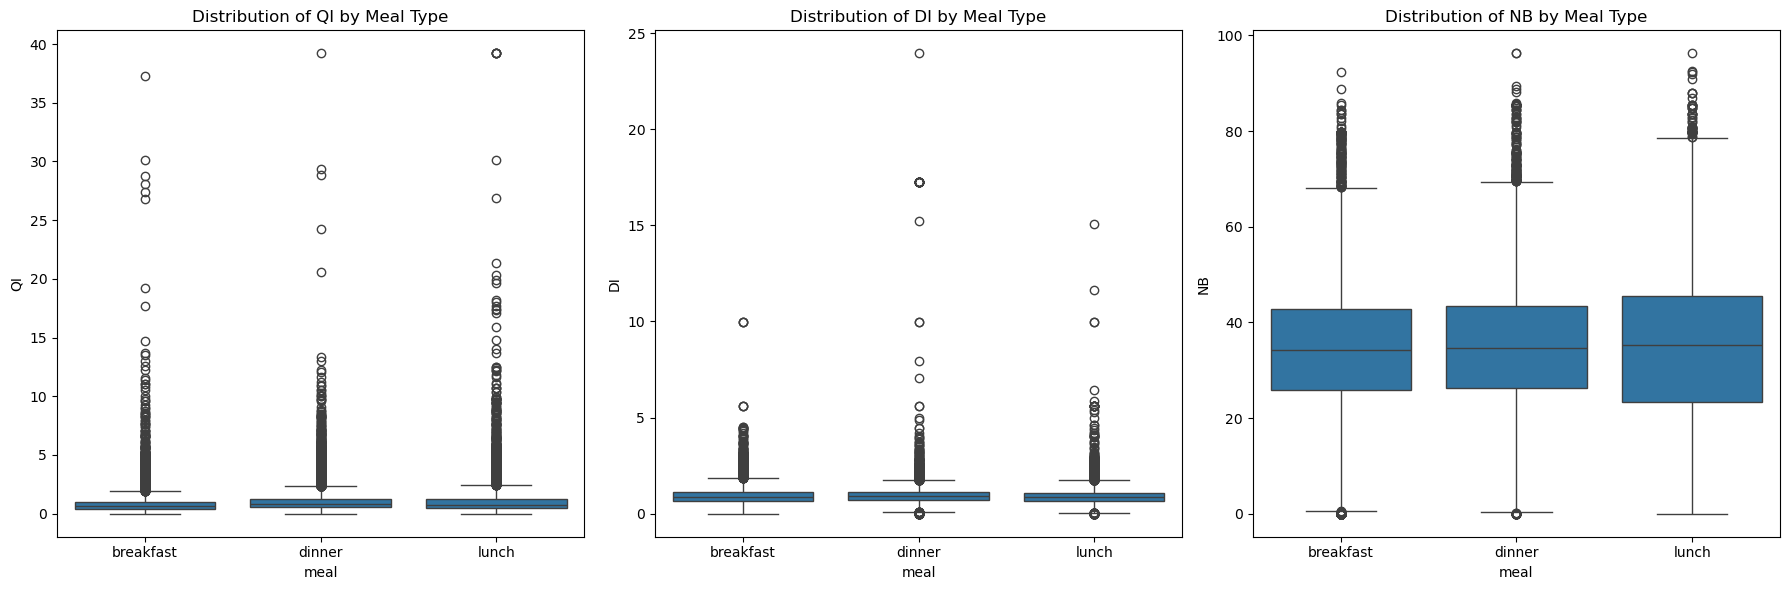

In [70]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6), sharey=False)


sns.boxplot(x='meal', y='QI', data=meal_summary_weighted, ax=axes[0])
axes[0].set_title('Distribution of QI by Meal Type')

sns.boxplot(x='meal', y='DI', data=meal_summary_weighted, ax=axes[1])
axes[1].set_title('Distribution of DI by Meal Type')

sns.boxplot(x='meal', y='NB', data=meal_summary_weighted, ax=axes[2])
axes[2].set_title('Distribution of NB by Meal Type')

plt.tight_layout()
plt.show()

In [71]:
meal_summary_weighted.sort_values('QI', ascending=False).head(30)

,subject_key,date,meal,total_energy,QI,DI,NB
28327,q2m7n7,2019-04-07,dinner,38.00,39.209308,0.731399,79.700156
2862,4fwdm8,2019-05-07,lunch,30.40,39.209308,0.731399,79.700156
42081,z9n435,2020-04-29,lunch,30.40,39.209308,0.731399,79.700156
15891,es4e3w,2021-10-08,lunch,30.40,39.209308,0.731399,79.700156
25592,n7mdum,2020-05-29,lunch,57.00,39.209308,0.731399,79.700156
126,244bwh,2020-09-03,lunch,26.60,39.209308,0.731399,79.700156
39254,xebfj3,2020-04-28,breakfast,353.75,37.282336,0.653248,61.188903
19353,gvbap7,2022-05-12,lunch,82.50,30.098723,0.716485,80.613589
13746,d95qcy,2021-09-30,breakfast,165.00,30.098723,0.716485,80.613589
2274,3zzjfu,2021-05-02,dinner,36.60,29.383715,7.074215,69.343095


In [72]:
qi_ratios[['combined_name', 'QI']].drop_duplicates('combined_name').sort_values('QI', ascending=False).head(30)

,combined_name,QI
465812,Bourquin Nutrition - Spirulina BIO,328.057851
490671,Bio Delikat - Bio Johannisbrot Schoten,64.428777
477847,La Costeña Salsa Verde,56.004199
4599,"Spinach, raw",55.004716
484235,Epinards,55.004716
4426,"Chicory, steamed, without addition of salt",51.971537
26934,Cress,49.595014
4453,"Spinach, steamed, without addition of salt",47.973909
472765,Bio Karotten Schweizer,45.238198
463795,Coop Naturaplan Grated carrot,45.238198



- Coca-Cola Energy
- Red Bull Zero Calories
- Chicken caesar salad (green salad, cheese, croutons, sauce)

-------------------------------------------------------

- niacin_eaten_ratio
- pantothenic_acid_eaten_ratio
- vitamin_b12_eaten_ratio
- vitamin_b6_eaten_ratio
- vitamin_b1_eaten_ratio
- vitamin_b2_eaten_ratio


In [73]:
df_food_scaled.groupby(['subject_key', 'meal', 'date',])["combined_name"].value_counts()

subject_key   meal       date        combined_name          
02ae3856ca04  breakfast  2018-11-26  Bread, alpine              3
                                     Balsamic salad dressing    1
                                     Banana                     1
                                     Coffee, with caffeine      1
                                     Corn Flakes                1
                                                               ..
zznk4w        lunch      2022-09-23  Mixed nuts                 1
                                     Paprika chips              1
                         2022-09-24  Banana cake                2
                                     Chocolate Chips/Leaves     2
                                     Cake, chocolate            1
Name: count, Length: 280106, dtype: int64

In [74]:
"""
subject_id = '02ae3856ca04'
target_date = pd.to_datetime('2018-11-26').date()
meal_name = 'breakfast'

# 1. Filter
df_breakfast = df_food_scaled[
    (df_food_scaled['subject_key'] == subject_id) &
    (df_food_scaled['date'] == target_date) &
    (df_food_scaled['meal'] == meal_name)
].copy()

# 2. Include 'eaten_at' so we can sort in consumption order
df_breakfast = df_breakfast[['combined_name', 'QI', 'DI', 'NB', 'eaten_at']].drop_duplicates('combined_name')

# If you don't have 'eaten_at', remove the .sort_values(...) line and skip the polygon approach

# 3. Sort by time (consumption order)
df_breakfast = df_breakfast.sort_values('eaten_at')

# 4. Compute combined meal
combined_qi = df_breakfast['QI'].mean()
combined_di = df_breakfast['DI'].mean()
combined_nb = df_breakfast['NB'].mean()

# 5. Prepare the polygon coordinates
x_coords = df_breakfast['QI'].tolist()
y_coords = df_breakfast['DI'].tolist()

# 6. Close the polygon by repeating the first point at the end
if len(x_coords) > 1:
    x_coords.append(x_coords[0])
    y_coords.append(y_coords[0])

plt.figure(figsize=(15, 9))

# 7. Fill the polygon (lightblue) and connect the points in black
#    Only if you have more than 2 items to form a polygon
if len(x_coords) > 2:
    plt.fill(x_coords, y_coords, alpha=0.2, color='lightblue', zorder=1)
    plt.plot(x_coords, y_coords, color='black', linestyle='-', zorder=2)

# 8. Plot each item as a circle
#    We'll do this manually instead of sns.scatterplot so we can control the polygon layering
for idx in range(len(df_breakfast)):
    row = df_breakfast.iloc[idx]
    x = row['QI']
    y = row['DI']
    nb_val = int(row['NB'])
    
    # Circle
    plt.scatter(x, y, s=300, color='lightgray', edgecolor='black', zorder=3)
    
    # NB in center
    plt.text(x, y, f"{nb_val}", ha='center', va='center', fontsize=8, color='black', zorder=4)
    
    # Food name offset
    plt.text(x + 0.05, y + 0.05, row['combined_name'], 
             ha='left', va='bottom', fontsize=8, color='black', zorder=4)

# 9. Plot the combined meal point (large circle with red outline)
plt.scatter(combined_qi, combined_di, s=400, color='white', edgecolors='red', zorder=5)
plt.text(combined_qi, combined_di, str(int(combined_nb)), 
         ha='center', va='center', color='red', fontsize=10, zorder=6)
plt.text(combined_qi, combined_di + 0.1, 'Combined Meal', 
         ha='center', va='bottom', color='red', fontsize=9, zorder=6)

# 10. Dashed lines at QI=1 and DI=1
plt.axvline(x=1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1, color='black', linestyle='--', linewidth=1)

# 11. Set x-axis and y-axis limits
plt.xlim(0, 5)
plt.ylim(0, 2)

# 12. Show only ticks at y=1 and y=2
plt.yticks([1, 2])

plt.xlabel('Qualifying Index (QI)')
plt.ylabel('Disqualifying Index (DI)')
plt.title(f'Day 1 {meal_name} on subject : {subject_id}')
plt.grid()
plt.show()

print("Combined NB:", combined_nb)"
"""


'\nsubject_id = \'02ae3856ca04\'\ntarget_date = pd.to_datetime(\'2018-11-26\').date()\nmeal_name = \'breakfast\'\n\n# 1. Filter\ndf_breakfast = df_food_scaled[\n    (df_food_scaled[\'subject_key\'] == subject_id) &\n    (df_food_scaled[\'date\'] == target_date) &\n    (df_food_scaled[\'meal\'] == meal_name)\n].copy()\n\n# 2. Include \'eaten_at\' so we can sort in consumption order\ndf_breakfast = df_breakfast[[\'combined_name\', \'QI\', \'DI\', \'NB\', \'eaten_at\']].drop_duplicates(\'combined_name\')\n\n# If you don\'t have \'eaten_at\', remove the .sort_values(...) line and skip the polygon approach\n\n# 3. Sort by time (consumption order)\ndf_breakfast = df_breakfast.sort_values(\'eaten_at\')\n\n# 4. Compute combined meal\ncombined_qi = df_breakfast[\'QI\'].mean()\ncombined_di = df_breakfast[\'DI\'].mean()\ncombined_nb = df_breakfast[\'NB\'].mean()\n\n# 5. Prepare the polygon coordinates\nx_coords = df_breakfast[\'QI\'].tolist()\ny_coords = df_breakfast[\'DI\'].tolist()\n\n# 6. Clos

# Statistical Tests

In [75]:

def significance_test(data, group_col, value_col, alpha=0.05, non_parametric=False):
    groups = data[group_col].unique()
    if len(groups) == 2:
        group1 = data[data[group_col] == groups[0]][value_col]
        group2 = data[data[group_col] == groups[1]][value_col]
        if non_parametric:
            stat, p_val = mannwhitneyu(group1, group2)
            test_name = "Mann-Whitney U"
        else:
            stat, p_val = ttest_ind(group1, group2)
            test_name = "t-test"
        return p_val < alpha, p_val, test_name, stat
    elif len(groups) > 2:
        group_values = [data[data[group_col] == grp][value_col] for grp in groups]
        if non_parametric:
            stat, p_val = kruskal(*group_values)
            test_name = "Kruskal-Wallis"
        else:
            stat, p_val = f_oneway(*group_values)
            test_name = "ANOVA"
        return p_val < alpha, p_val, test_name, stat
    return False, 1.0, "No test", 0
def create_quartiles(df, column_name, ncut=4):
    """Add quartile categories (1-4) for a specified column in a DataFrame."""
    df_copy = df.copy()
    df_copy[column_name + "_quartile"] = pd.qcut(
        df_copy[column_name], q=ncut, labels=[f"Q{i}" for i in range(1, ncut + 1)]
    )
    return df_copy
def add_stat_annotation(ax, data, x, y, pairs, test="Mann-Whitney", text_format="star"):
    """Add statistical annotation bars to the plot."""
    annotator = Annotator(ax, pairs, data=data, x=x, y=y)
    annotator.configure(
        test=test,
        text_format=text_format,
        line_width=0.5,  # Thinner lines
        line_height=0.02,
    )  # Slightly shorter bars
    annotator.apply_and_annotate()
def test_quartile_differences(
    df,
    column_name,
    value_col,
    extremes=True,
    alpha=0.05,
    non_parametric=True,
    ax=None,
    palette="Spectral",
    make_quartile=True,
    verbose=False,
):
    """
    Test differences between quartiles of a specified column and create a boxplot with significance bars.
    """
    df = df.copy()
    if make_quartile:
        df = create_quartiles(df, column_name)
        quartile_col = column_name + "_quartile"
    else:
        quartile_col = column_name
    if extremes:
        df = df[df[quartile_col].isin(["Q1", "Q4"])]
        if isinstance(df[quartile_col].dtype, pd.CategoricalDtype):
            df[quartile_col] = df[quartile_col].cat.remove_unused_categories()
    # Create plot if ax not provided
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(3, 3))
    # Create boxplot
    sns.boxplot(
        data=df,
        x=quartile_col,
        y=value_col,
        ax=ax,
        linewidth=0.5,
        fliersize=1,
        width=0.5,
        palette=palette,
    )
    # Get unique groups and create pairs for comparison
    groups = sorted(df[quartile_col].dropna().astype(str).unique())
    if extremes:
        # If only comparing extremes, just compare Q1 and Q4
        pairs = [("Q1", "Q4")]
    else:
        # Create all possible pairs of quartiles
        pairs = list(combinations(groups, 2))
    # Determine statistical test
    test = "Mann-Whitney" if non_parametric else "t-test"
    # Add statistical annotation
    add_stat_annotation(ax, df, x=quartile_col, y=value_col, pairs=pairs, test=test)
    # Run the original significance test for console output
    is_sig, p_val, test_name, stat = significance_test(
        df, quartile_col, value_col, alpha=alpha, non_parametric=non_parametric
    )
    if verbose:
        if is_sig:
            print(
                f"{column_name} -> {value_col}\tSignificant differences exist.",
                f"{test_name} statistic: {stat:.3f} p-value: {p_val:.3f}",
            )
        else:
            print(f"{column_name} -> {value_col}\tNo significant differences.")
    # Add test statistics to plot
    ylims = ax.get_ylim()
    yrange = ylims[1] - ylims[0]
    text_y = ylims[1] + yrange * 0.05  # Position text above the plot
    # Format test information with abbreviated names
    test_abbrev = {
        "Kruskal-Wallis": "KW",
        "Mann-Whitney U": "MW",
        "ANOVA": "ANOVA",
        "t-test": "t-test",
    }
    abbreviated_name = test_abbrev.get(test_name, test_name)
    if test_name == "Kruskal-Wallis":
        test_info = f"${abbreviated_name}:$ $H={stat:.2f}$, $p={p_val:.3f}$"
    elif test_name == "Mann-Whitney U":
        test_info = f"${abbreviated_name}:$ $U={stat:.2f}$, $p={p_val:.3f}$"
    else:
        test_info = f"${abbreviated_name}:$ $t={stat:.2f}$, $p={p_val:.3f}$"
    # Add text with test information
    ax.text(
        0,
        text_y,
        test_info,
        horizontalalignment="left",
        verticalalignment="bottom",
        fontsize=8,
    )
    # Adjust plot limits to accommodate the text
    ax.set_ylim(ylims[0], ylims[1] + yrange * 0.15)
    return ax


In [76]:
largest_meals.columns

Index(['subject_key', 'date', 'meal', 'total_energy', 'QI', 'DI', 'NB'], dtype='object')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

breakfast vs. lunch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.155e-01 U_stat=4.918e+05
lunch vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:2.915e-03 U_stat=5.469e+05
breakfast vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:5.988e-02 U_stat=5.337e+05


C:\Users\Sophie\AppData\Local\Temp\ipykernel_16652\363652421.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='meal', ylabel='NB'>

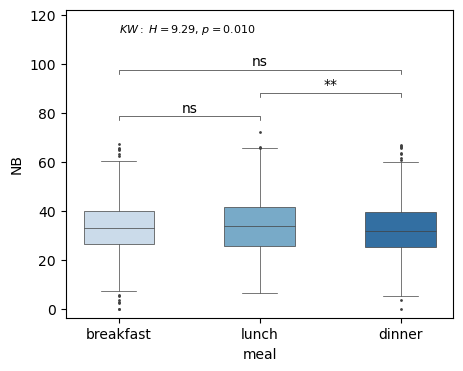

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(5,4)) 
test_quartile_differences(
    largest_meals, # your dataframe
    'meal', # grouping column (e.g good or bad food group)
    'NB', # target column e.g NB or QI or DI
    extremes=False,
    make_quartile=False,
    palette="Blues",
    verbose=False,
    ax=ax,
)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

breakfast vs. lunch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.459e-06 U_stat=4.451e+05
lunch vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:8.457e-02 U_stat=5.306e+05
breakfast vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:9.967e-04 U_stat=4.660e+05


C:\Users\Sophie\AppData\Local\Temp\ipykernel_16652\363652421.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='meal', ylabel='QI'>

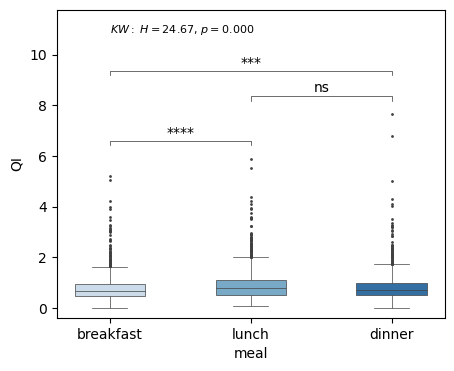

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))  
test_quartile_differences(
    largest_meals, # your dataframe
    'meal', # grouping column (e.g good or bad food group)
    'QI', # target column e.g NB or QI or DI
    extremes=False,
    make_quartile=False,
    palette="Blues",
    verbose=False,
    ax=ax,
)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

breakfast vs. lunch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.774e-04 U_stat=5.570e+05
lunch vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:8.124e-02 U_stat=5.308e+05
breakfast vs. dinner: Mann-Whitney-Wilcoxon test two-sided, P_val:6.940e-08 U_stat=5.796e+05


C:\Users\Sophie\AppData\Local\Temp\ipykernel_16652\363652421.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='meal', ylabel='DI'>

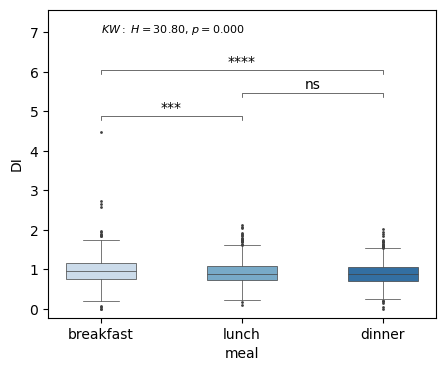

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
test_quartile_differences(
    largest_meals, # your dataframe
    'meal', # grouping column (e.g good or bad food group)
    'DI', # target column e.g NB or QI or DI
    extremes=False,
    make_quartile=False,
    palette="Blues",
    verbose=False,
    ax=ax,
)

## QI, DI, NB and energy consumption over time 

In [80]:
def plot_subject_daywise(subject_id, df_food_scaled):

    # Daily median
    daily_nutrient_medians = (df_food_scaled.groupby(['subject_key', 'date'])[['QI', 'DI', 'NB']].median().reset_index())
    
    # Compute meal-level weighted aggregates
    meal_summary_weighted = (df_food_scaled.groupby(['subject_key', 'date', 'meal']).apply(aggregate_meal).reset_index())
    
    # Filter for the specific subject
    subject_daily = daily_nutrient_medians[daily_nutrient_medians['subject_key'] == subject_id]
    subject_meals = meal_summary_weighted[meal_summary_weighted['subject_key'] == subject_id]
    
    # total_energy by meal type for each day
    pivot_energy = subject_meals.pivot(index='date', columns='meal', values='total_energy')


    # Plot : Daywise Nutrient Quality 
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    # QI and DI axis
    ax1.plot(subject_daily['date'], subject_daily['QI'], label='QI', marker='o', color='blue')
    ax1.plot(subject_daily['date'], subject_daily['DI'], label='DI', marker='o', color='green')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('QI, DI', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_ylim(0, 1.5)
    
    # NB axis
    ax2 = ax1.twinx()
    ax2.plot(subject_daily['date'], subject_daily['NB'], label='NB', marker='o', color='red')
    ax2.set_ylabel('NB (%)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 100)
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.title(f'QI, DI and NB over time for Subject : {subject_id}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

    # Plot : Bar Chart of Daily Energy Consumption by Meal Type
    pivot_energy.plot(kind='bar', figsize=(12,6))
    plt.title(f"Daily Energy Consumption by Meal Type for Subject : {subject_id}")
    plt.ylabel("Total Energy (kcal)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(subject_daily)
    
    return subject_daily, subject_meals, pivot_energy

C:\Users\Sophie\AppData\Local\Temp\ipykernel_16652\1070765091.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  meal_summary_weighted = (df_food_scaled.groupby(['subject_key', 'date', 'meal']).apply(aggregate_meal).reset_index())


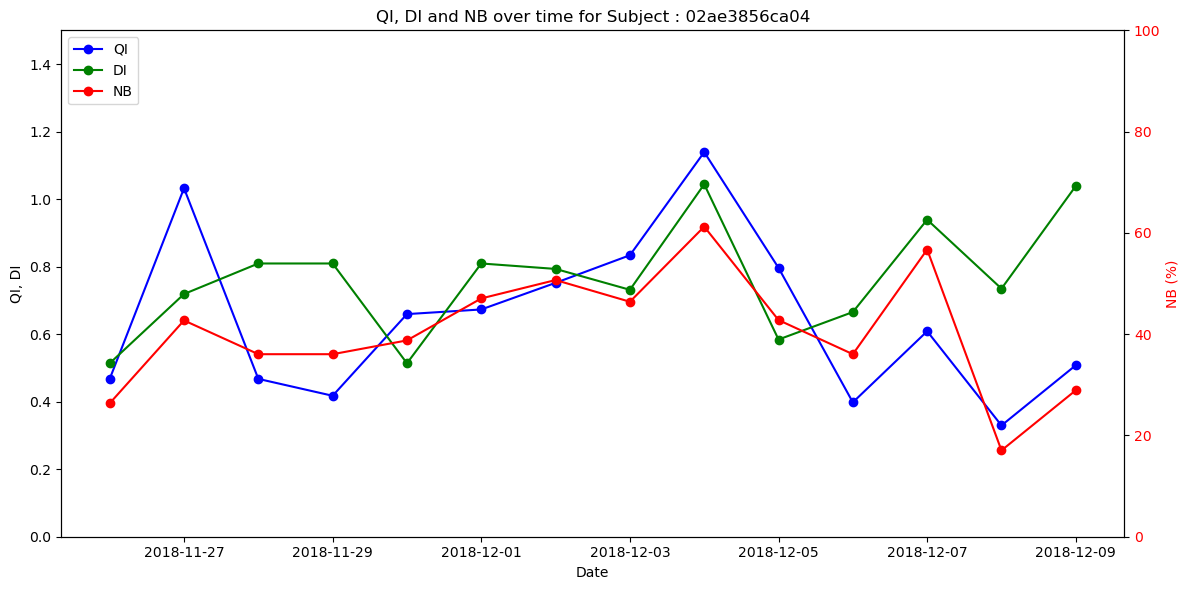

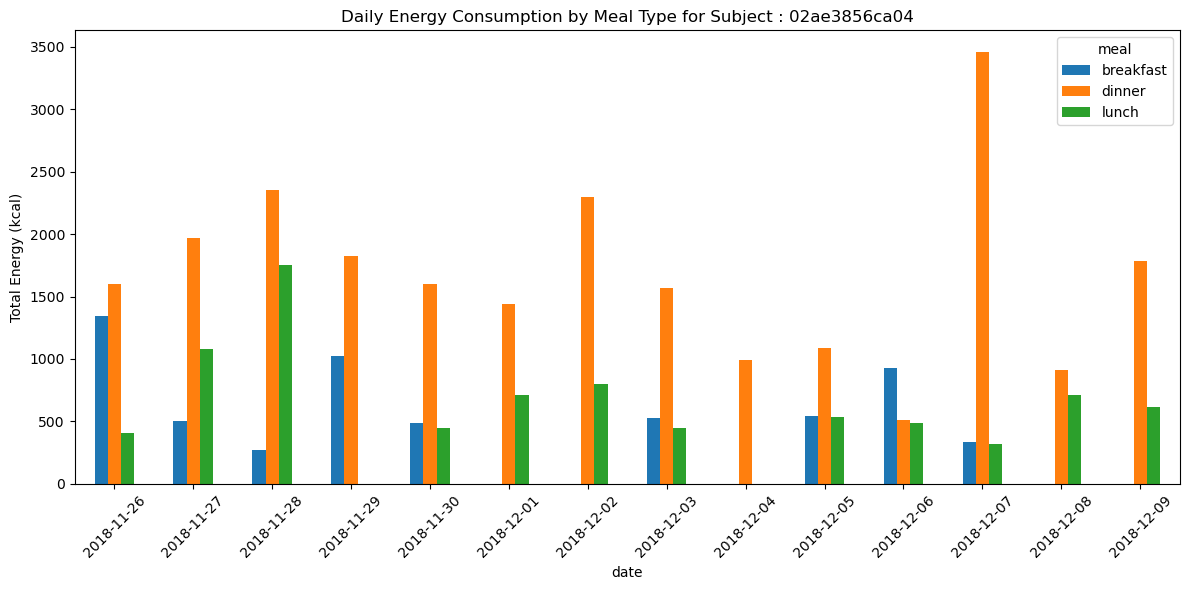

     subject_key        date        QI        DI         NB
0   02ae3856ca04  2018-11-26  0.467519  0.513713  26.346008
1   02ae3856ca04  2018-11-27  1.032265  0.718914  42.713951
2   02ae3856ca04  2018-11-28  0.467519  0.809386  36.044188
3   02ae3856ca04  2018-11-29  0.417497  0.809386  36.044188
4   02ae3856ca04  2018-11-30  0.659438  0.513713  38.768530
5   02ae3856ca04  2018-12-01  0.673187  0.809386  47.057553
6   02ae3856ca04  2018-12-02  0.752033  0.793251  50.686705
7   02ae3856ca04  2018-12-03  0.833804  0.731399  46.402644
8   02ae3856ca04  2018-12-04  1.139287  1.043946  61.234318
9   02ae3856ca04  2018-12-05  0.796425  0.584174  42.785547
10  02ae3856ca04  2018-12-06  0.398094  0.665487  36.044188
11  02ae3856ca04  2018-12-07  0.608654  0.939142  56.711733
12  02ae3856ca04  2018-12-08  0.329572  0.734886  17.041533
13  02ae3856ca04  2018-12-09  0.507907  1.038867  28.919594


In [81]:
subject_id = '02ae3856ca04'
subject_daily, subject_meals, pivot_energy = plot_subject_daywise(subject_id, df_food_scaled)

In [82]:
specific_date = pd.to_datetime('2018-12-01').date()
df_specific = df_food_scaled[(df_food_scaled['subject_key'] == '02ae3856ca04') & (df_food_scaled['date'] == specific_date)][['energy_kcal_eaten', 'date', 'QI', 'DI', 'NB', 'meal']].sort_values('date')
df_specific



,energy_kcal_eaten,date,QI,DI,NB,meal
23481,12.75,2018-12-01,0.467519,0.390487,14.285714,dinner
81687,95.00,2018-12-01,1.070674,0.513713,62.390552,lunch
122543,133.20,2018-12-01,0.793998,2.004256,51.501856,dinner
126884,324.00,2018-12-01,1.042181,2.168672,56.964689,dinner
152720,156.00,2018-12-01,0.193661,0.517566,13.369963,dinner
173717,242.00,2018-12-01,0.398094,0.809386,36.044188,dinner
208821,86.35,2018-12-01,1.544642,4.464696,55.882138,dinner
382295,141.60,2018-12-01,0.061822,0.045792,6.182230,dinner
382296,155.76,2018-12-01,0.061822,0.045792,6.182230,dinner
391904,84.30,2018-12-01,0.010698,0.985452,1.069826,dinner


C:\Users\Sophie\AppData\Local\Temp\ipykernel_16652\1070765091.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  meal_summary_weighted = (df_food_scaled.groupby(['subject_key', 'date', 'meal']).apply(aggregate_meal).reset_index())


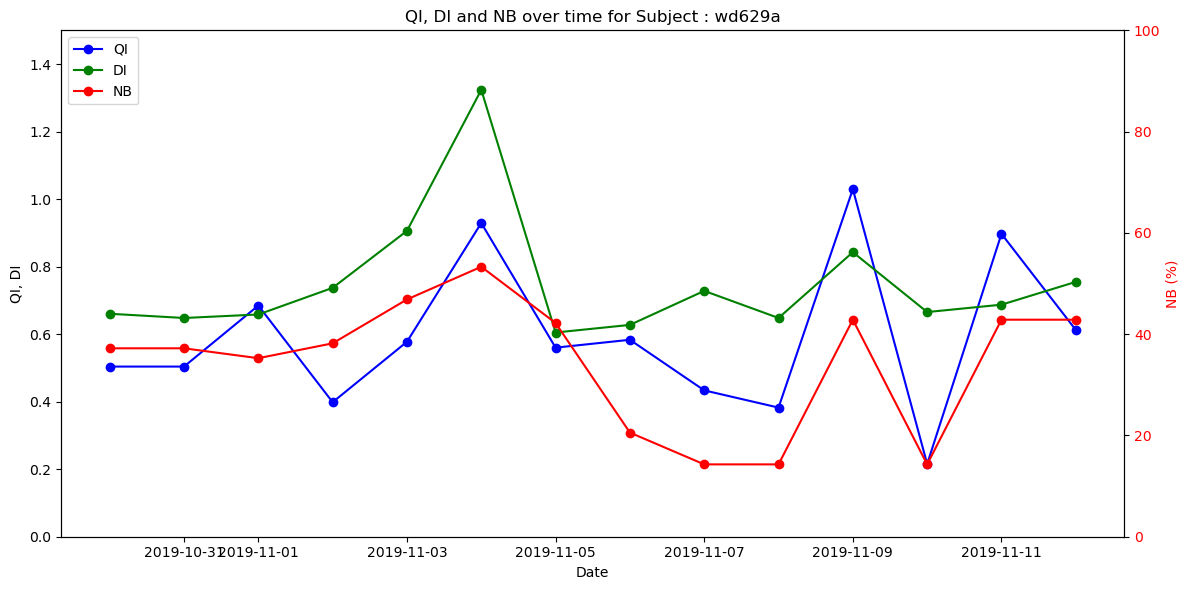

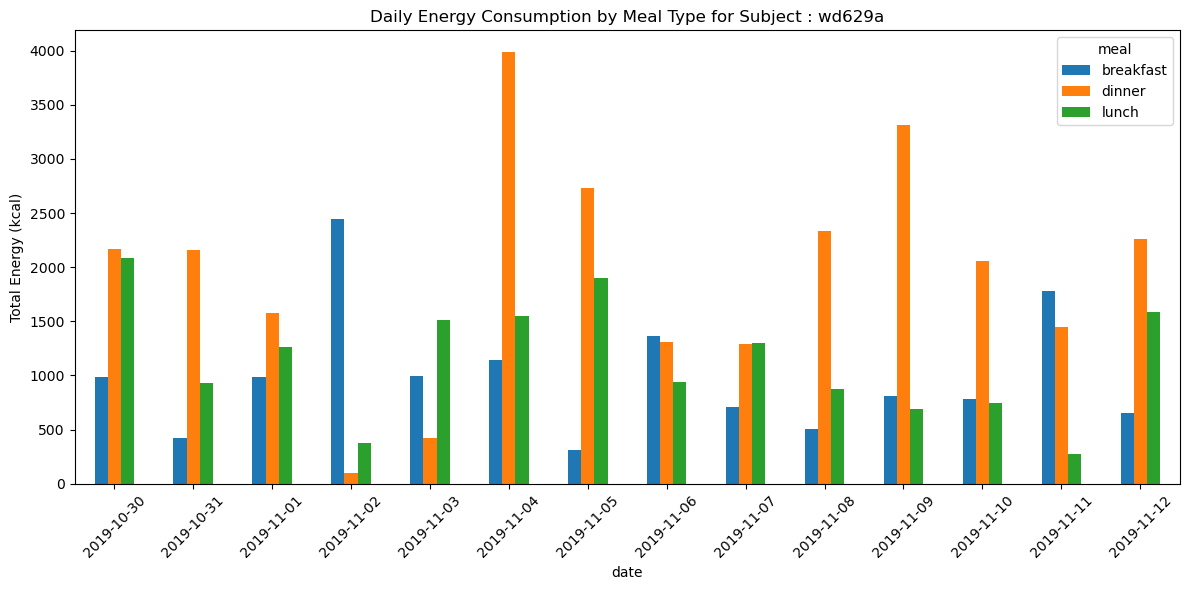

      subject_key        date        QI        DI         NB
13017      wd629a  2019-10-30  0.504011  0.660461  37.209215
13018      wd629a  2019-10-31  0.504009  0.647932  37.209215
13019      wd629a  2019-11-01  0.684815  0.658266  35.253698
13020      wd629a  2019-11-02  0.398450  0.737205  38.192191
13021      wd629a  2019-11-03  0.577516  0.906045  46.855053
13022      wd629a  2019-11-04  0.929247  1.323729  53.310040
13023      wd629a  2019-11-05  0.560089  0.604905  42.207701
13024      wd629a  2019-11-06  0.583371  0.627451  20.565149
13025      wd629a  2019-11-07  0.433528  0.728227  14.285714
13026      wd629a  2019-11-08  0.382498  0.647932  14.285714
13027      wd629a  2019-11-09  1.029670  0.842859  42.857143
13028      wd629a  2019-11-10  0.215476  0.665487  14.285714
13029      wd629a  2019-11-11  0.897169  0.687349  42.857143
13030      wd629a  2019-11-12  0.612510  0.754844  42.857143


In [83]:
subject_id = 'wd629a'
subject_daily, subject_meals, pivot_energy = plot_subject_daywise(subject_id, df_food_scaled)

C:\Users\Sophie\AppData\Local\Temp\ipykernel_16652\1070765091.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  meal_summary_weighted = (df_food_scaled.groupby(['subject_key', 'date', 'meal']).apply(aggregate_meal).reset_index())


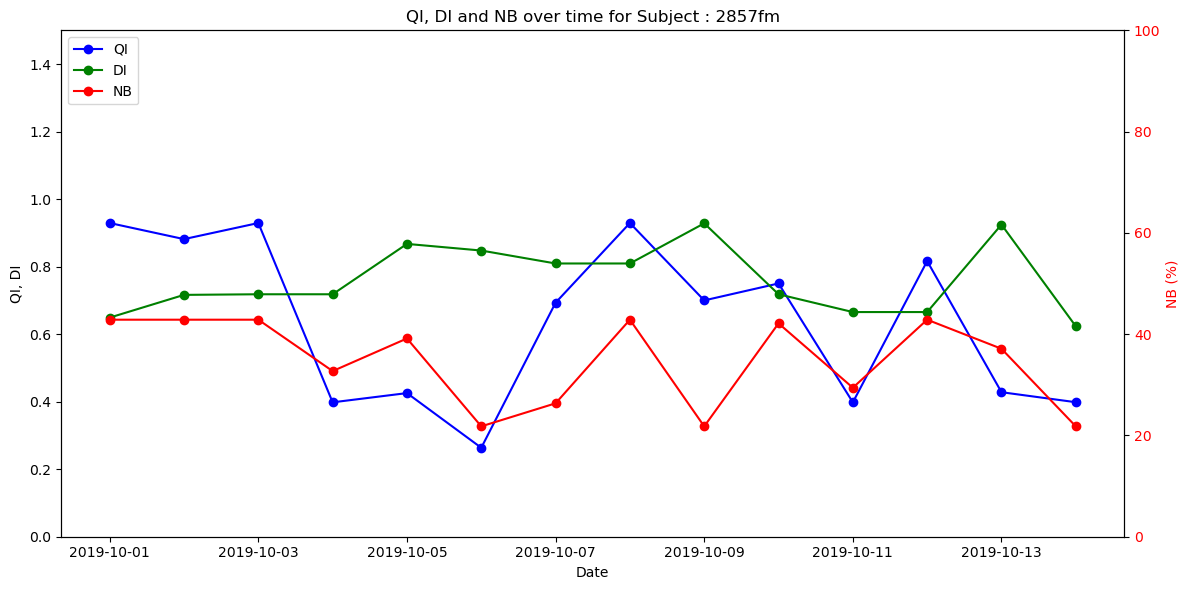

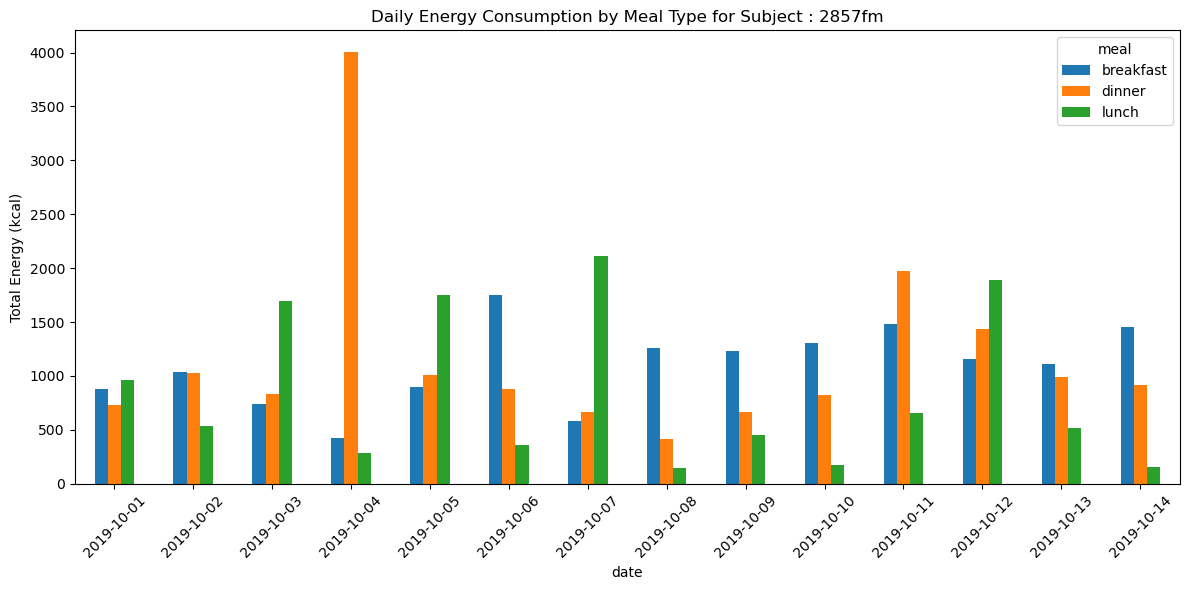

   subject_key        date        QI        DI         NB
56      2857fm  2019-10-01  0.929247  0.649079  42.857143
57      2857fm  2019-10-02  0.881525  0.716385  42.857143
58      2857fm  2019-10-03  0.929247  0.718191  42.857143
59      2857fm  2019-10-04  0.398094  0.718191  32.707453
60      2857fm  2019-10-05  0.425447  0.867365  39.150760
61      2857fm  2019-10-06  0.263460  0.847721  21.795000
62      2857fm  2019-10-07  0.693246  0.809386  26.346008
63      2857fm  2019-10-08  0.929247  0.809386  42.857143
64      2857fm  2019-10-09  0.699990  0.928302  21.795000
65      2857fm  2019-10-10  0.750240  0.718191  42.132577
66      2857fm  2019-10-11  0.398094  0.665487  29.420957
67      2857fm  2019-10-12  0.816500  0.665487  42.857143
68      2857fm  2019-10-13  0.428085  0.924622  37.118189
69      2857fm  2019-10-14  0.398450  0.623383  21.795000


In [84]:
subject_id = '2857fm'
subject_daily, subject_meals, pivot_energy = plot_subject_daywise(subject_id, df_food_scaled)

In [85]:
qi_ratios[qi_ratios['food_group'] == 'vegetables'].describe().T

,count,mean,std,min,25%,50%,75%,max
folate_eaten_ratio,47567.0,6.505492,6.811440,0.00,2.063492,5.000000,7.500000,61.764706
all_trans_retinol_equivalents_activity_eaten_ratio,47567.0,0.014187,0.150252,0.00,0.000000,0.000000,0.000000,1.696429
beta_carotene_eaten_ratio,47567.0,117.647860,172.341139,0.00,0.124224,26.302521,225.555556,669.387755
vitamin_c_eaten_ratio,47567.0,19.861593,28.749653,0.00,2.596491,9.803922,26.158730,145.641026
vitamin_d_eaten_ratio,47567.0,0.741475,4.043387,0.00,0.000000,0.000000,0.000000,57.777778
vitamin_e_activity_eaten_ratio,47567.0,2.852257,4.320873,0.00,0.492754,1.754386,4.444444,52.307692
calcium_eaten_ratio,47567.0,2.159780,2.194685,0.00,0.701754,1.481481,3.217391,18.823529
iron_eaten_ratio,47567.0,2.565025,3.164225,0.00,0.666667,1.388889,3.584229,111.111111
magnesium_eaten_ratio,47567.0,2.887121,2.809662,0.00,1.381579,2.232143,4.166667,60.096154
phosphorus_eaten_ratio,47567.0,3.308566,2.550166,0.00,1.954887,2.490842,5.079365,106.593407


In [86]:
di_ratios[di_ratios['food_group'] == 'vegetables'].describe().T

,count,mean,std,min,25%,50%,75%,max
fat_eaten_ratio,47567.0,0.362779,0.382360,0.0,0.197239,0.320513,0.388500,2.913753
fatty_acids_saturated_eaten_ratio,47567.0,0.115224,0.333772,0.0,0.000000,0.000000,0.144300,7.954545
cholesterol_eaten_ratio,47567.0,0.097477,1.051490,0.0,0.000000,0.000000,0.000000,12.083333
sugar_eaten_ratio,47567.0,1.635959,0.950553,0.0,1.098039,1.600000,2.438095,3.789474
sodium_eaten_ratio,47567.0,1.856980,6.233844,0.0,0.063492,0.185185,0.833333,58.333333
salt_eaten_ratio,47567.0,1.451110,5.963756,0.0,0.000000,0.000000,0.606061,120.000000
DI,47567.0,0.919922,2.007584,0.0,0.361079,0.475585,0.610122,30.826807


Questions :

- Should I look at the ratio of each nutrient for a specific meal for an individual? Or should I look at for a whole day (because if we are looking at the impact of the vegetable specifically, breakfast isn't the meal where everyone eat vegetable)? 
- I don't think I have understood what I should do and what should I look at more into the different nutrient informations in the food_group vegetable. Because When I look at in general, the highest qi ratios in vegetables are the beta_caroten_ratio and the vitamin_c_ratio (which is )

## Daywise Nutrient Quality Assessment 

In [87]:
df_food_scaled_copy = df_food_scaled.copy()

ratio_cols_qi = [col for col in qi_ratios.columns if col.endswith('_ratio')]
ratio_cols_di = [col for col in di_ratios.columns if col.endswith('_ratio')]

df_food_scaled_copy = df_food_scaled_copy.join(qi_ratios[ratio_cols_qi])
df_food_scaled_copy = df_food_scaled_copy.join(di_ratios[ratio_cols_di])


In [88]:
subject_id = '02ae3856ca04'
target_date = pd.to_datetime('2018-11-26').date() 

df_day = df_food_scaled_copy[(df_food_scaled_copy['subject_key'] == subject_id) & (df_food_scaled['date'] == target_date)]
nutrient_ratio_cols = [col for col in df_day.columns if col.endswith('_ratio')]



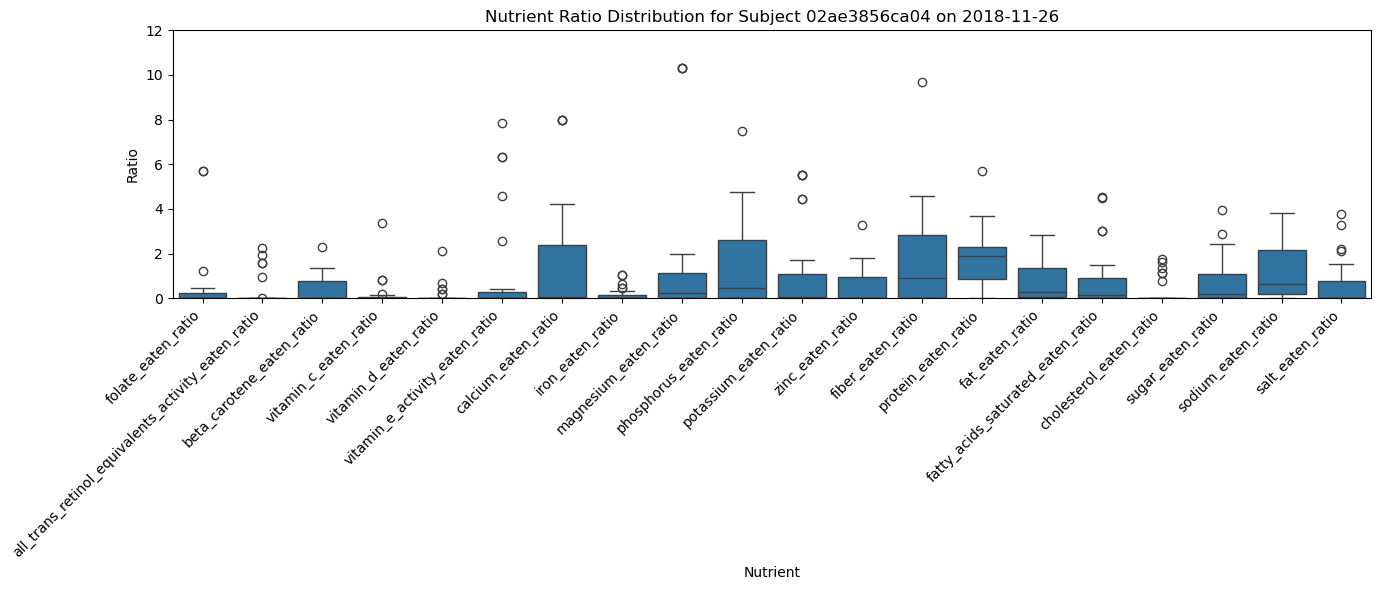

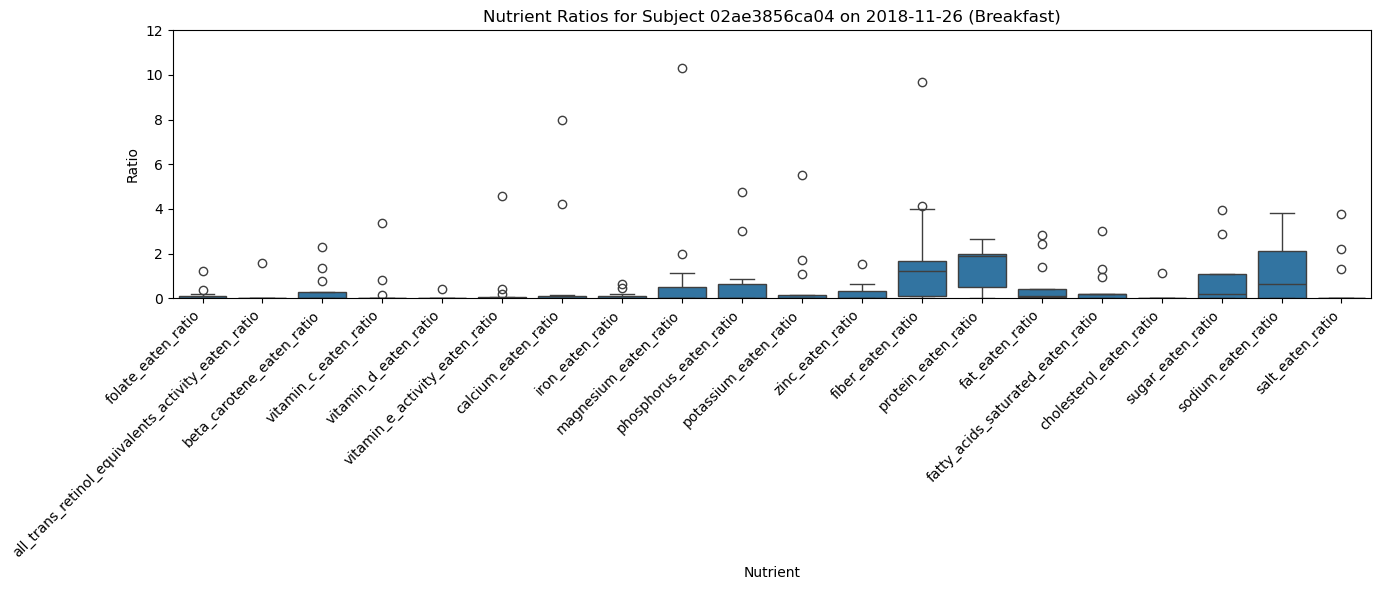

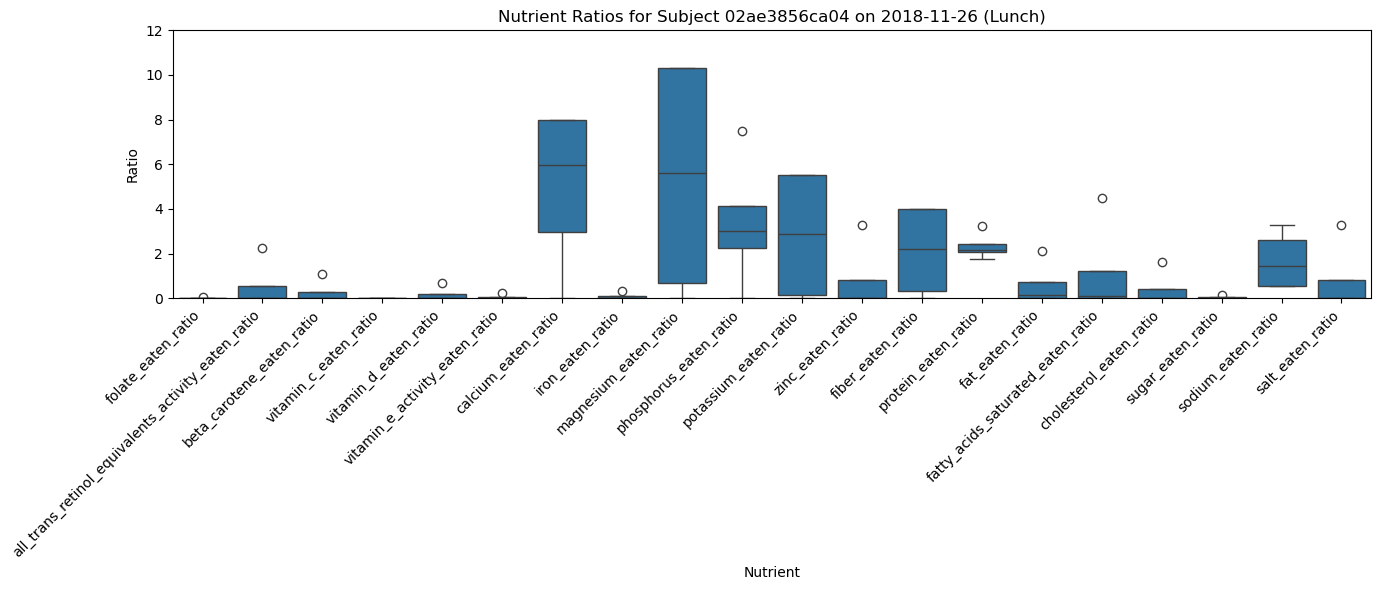

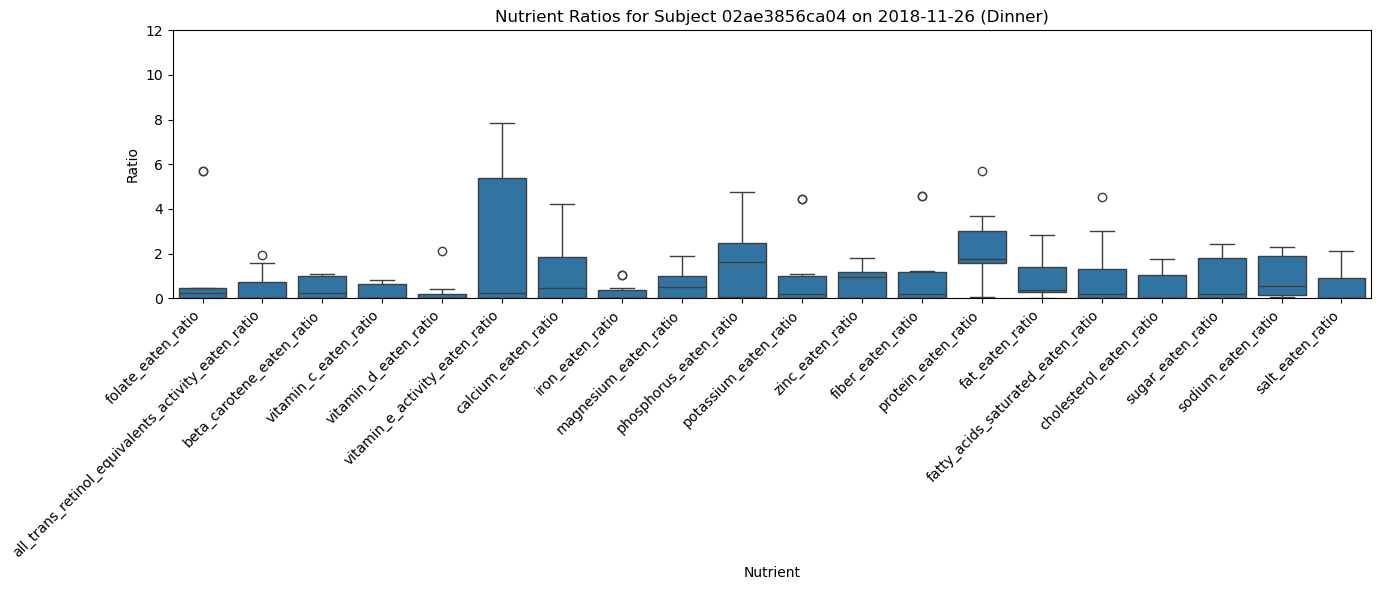

In [89]:
df_melted = pd.melt(df_day, id_vars=['combined_name'], value_vars=nutrient_ratio_cols, var_name='nutrient', value_name='ratio')

plt.figure(figsize=(14,6))
sns.boxplot(x='nutrient', y='ratio', data=df_melted)
plt.title(f'Nutrient Ratio Distribution for Subject {subject_id} on {target_date}')
plt.xlabel('Nutrient')
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 12)
plt.tight_layout()
plt.show()

meal_types = ['breakfast', 'lunch', 'dinner']

for meal in meal_types:
    df_meal = df_day[df_day['meal'] == meal]
    if df_meal.empty:
        print(f"No data for {meal} on {target_date} for subject {subject_id}.")
        continue
    
    # Melt the DataFrame to long format for boxplotting
    df_melted = pd.melt(df_meal, id_vars=['combined_name'], value_vars=nutrient_ratio_cols, var_name='nutrient',value_name='ratio')
    
    plt.figure(figsize=(14, 6))
    sns.boxplot(x='nutrient', y='ratio', data=df_melted)
    plt.title(f'Nutrient Ratios for Subject {subject_id} on {target_date} ({meal.capitalize()})')
    plt.xlabel('Nutrient')
    plt.ylabel('Ratio')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 12)
    plt.tight_layout()
    plt.show()


## Distribution Plot for QI, DI and NB by food group

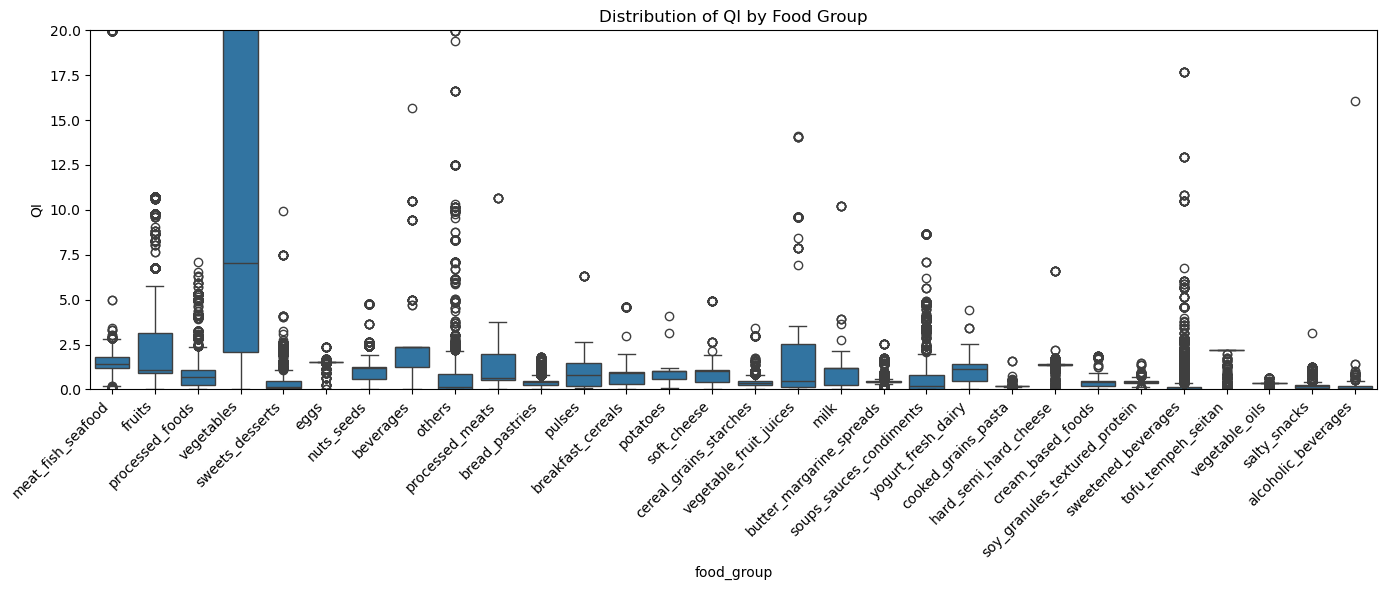

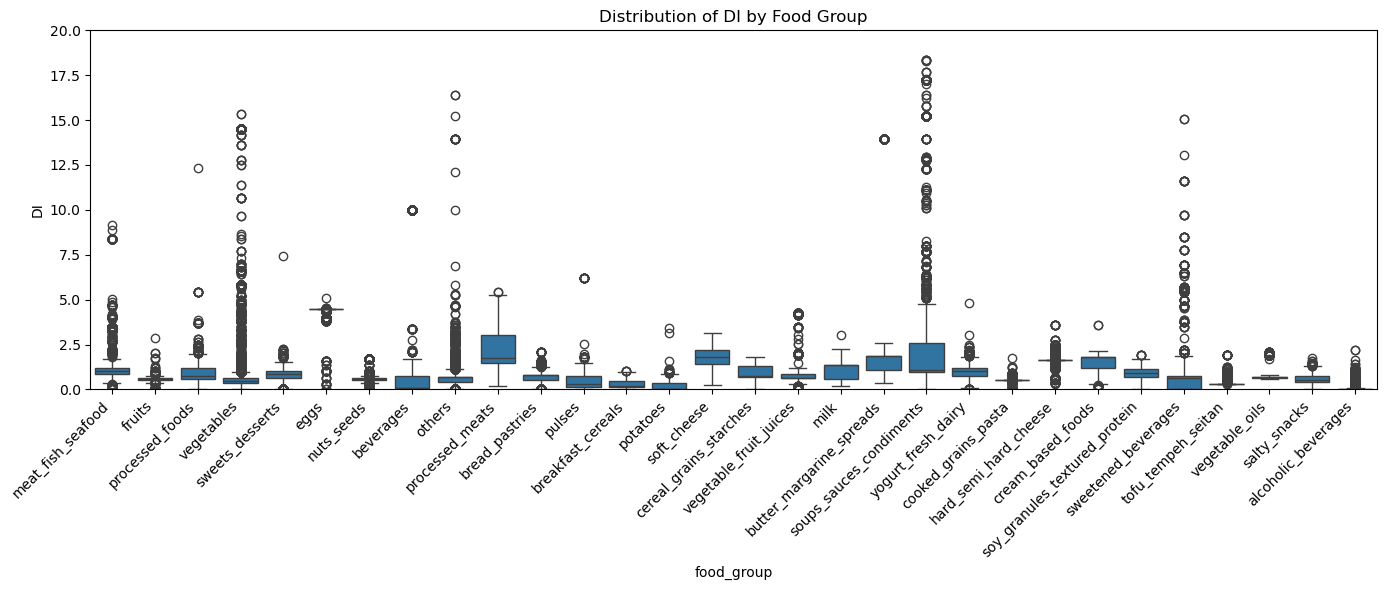

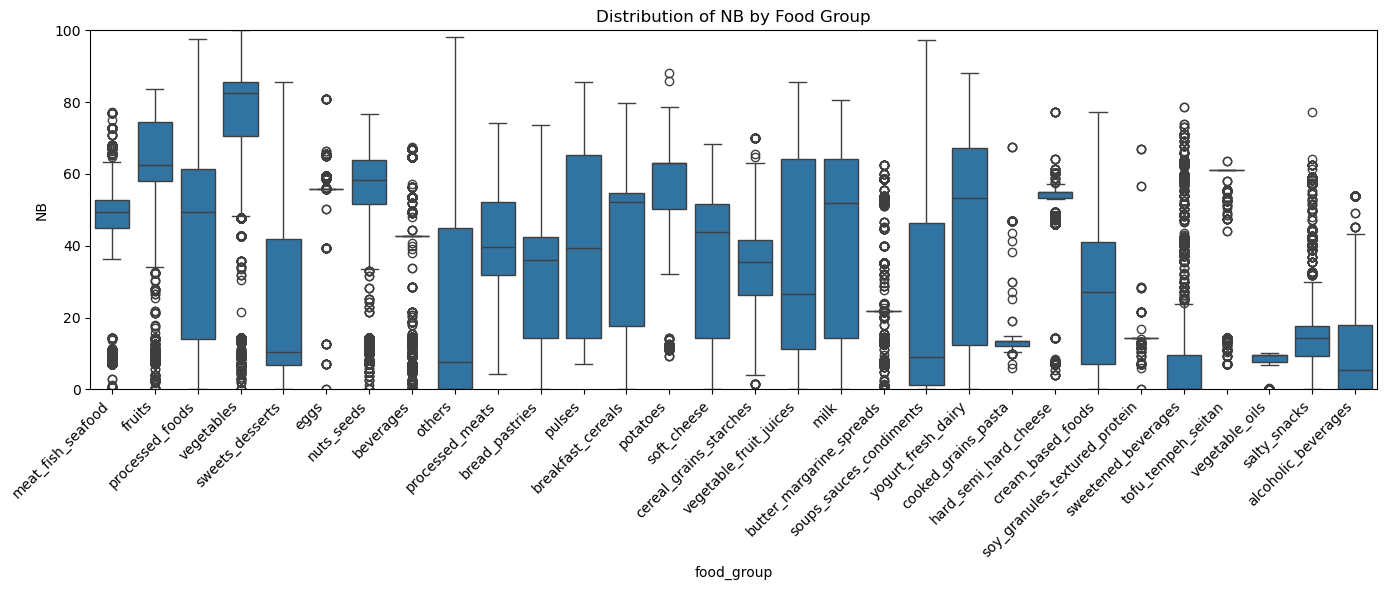

In [90]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='food_group', y='QI', data=df_food_scaled_copy)
plt.title('Distribution of QI by Food Group')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='food_group', y='DI', data=df_food_scaled_copy)
plt.title('Distribution of DI by Food Group')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='food_group', y='NB', data=df_food_scaled_copy)
plt.title('Distribution of NB by Food Group')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

## Heatmap of Nutrient ratio

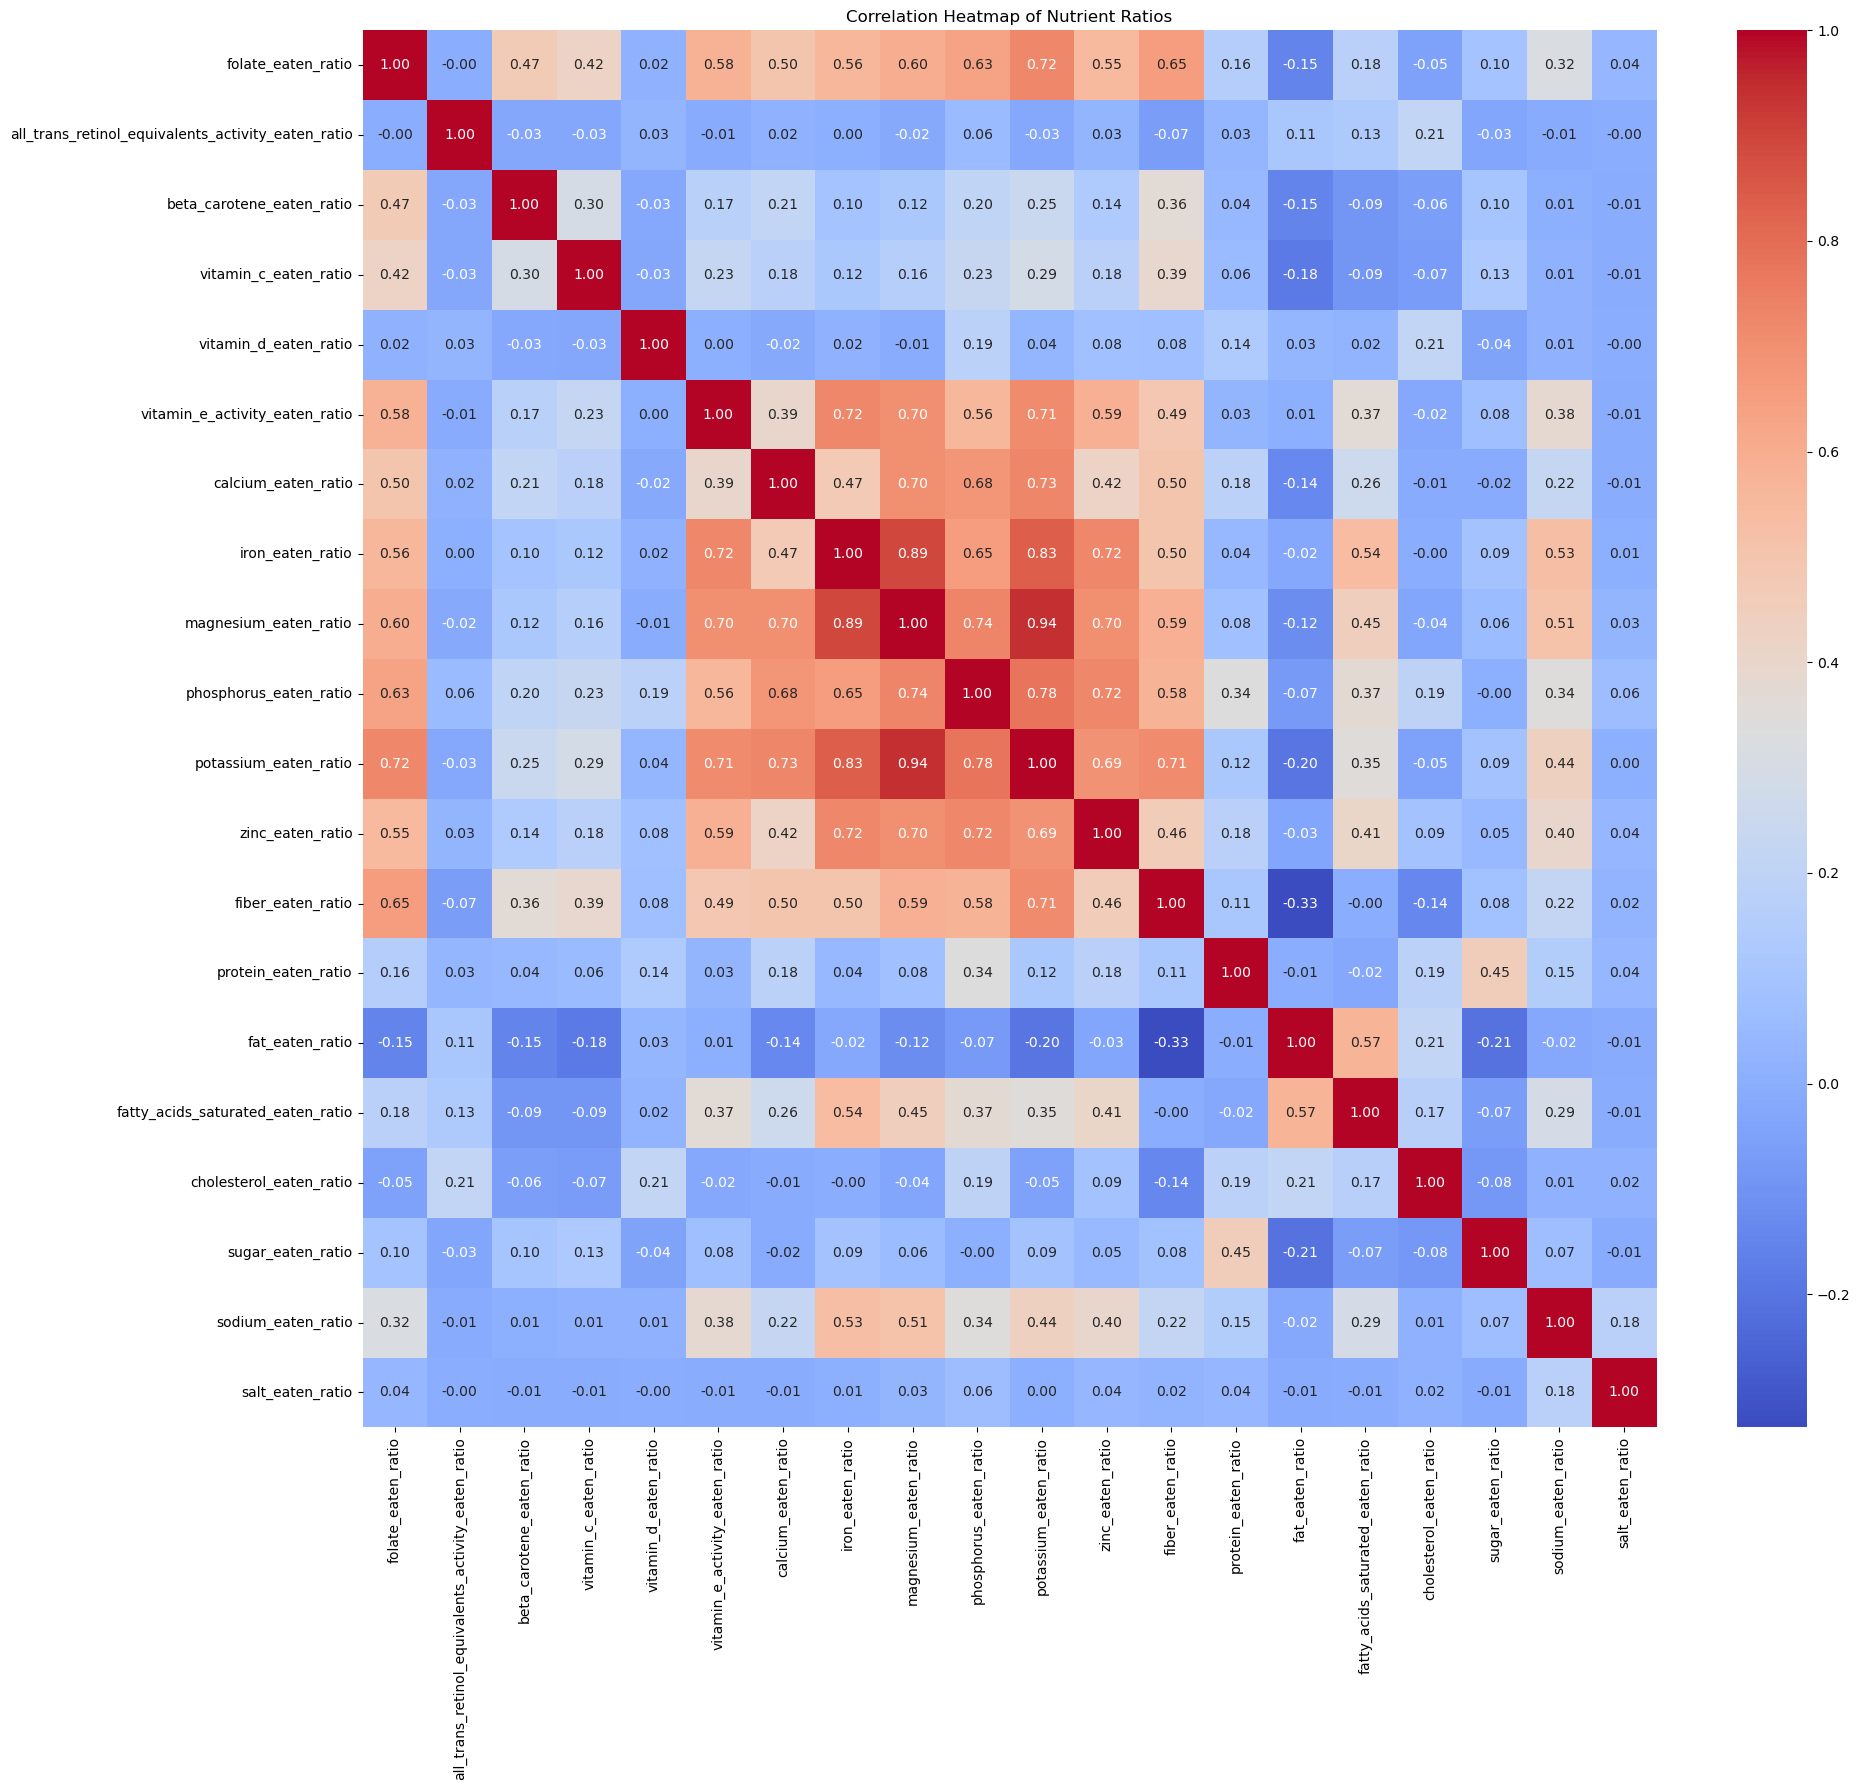

In [91]:
ratio_cols = [col for col in df_food_scaled_copy.columns if col.endswith('_ratio')]

corr_matrix = df_food_scaled_copy[ratio_cols].corr()

plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Nutrient Ratios')
plt.tight_layout()
plt.show()

## Relationship of Nutrient Balance to Qualifying Index (QI)

In [92]:
def plot_qi_nb_scatter(subject_id, df_food_scaled, start_date=None, end_date=None):
    

    subject_df = df_food_scaled[df_food_scaled['subject_key'] == subject_id].copy()
    
    # Look at specific time frame
    if start_date is not None:
        subject_df = subject_df[subject_df['date'] >= start_date]
    if end_date is not None:
        subject_df = subject_df[subject_df['date'] <= end_date]

  
    daily_agg = (subject_df.groupby('date')[['QI', 'NB']].median().reset_index())
    

    plt.figure(figsize=(10, 8))
    
    # Individual meal components
    plt.scatter(subject_df['QI'], subject_df['NB'], color='black', alpha=0.7, label='Individual Meal Components')
    
    # Daily aggregated values 
    plt.scatter(daily_agg['QI'], daily_agg['NB'], color='red', s=80, label='Daily Combined Meals')
    
    
    plt.axvline(x=1, color='black', linestyle='--', alpha=1)
   
    plt.xlabel('Qualifying Index (QI)')
    plt.ylabel('% Nutrient Balance (NB)')
    plt.xlim(0, 14)
    plt.title(f'QI vs NB for Subject : {subject_id}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(daily_agg)


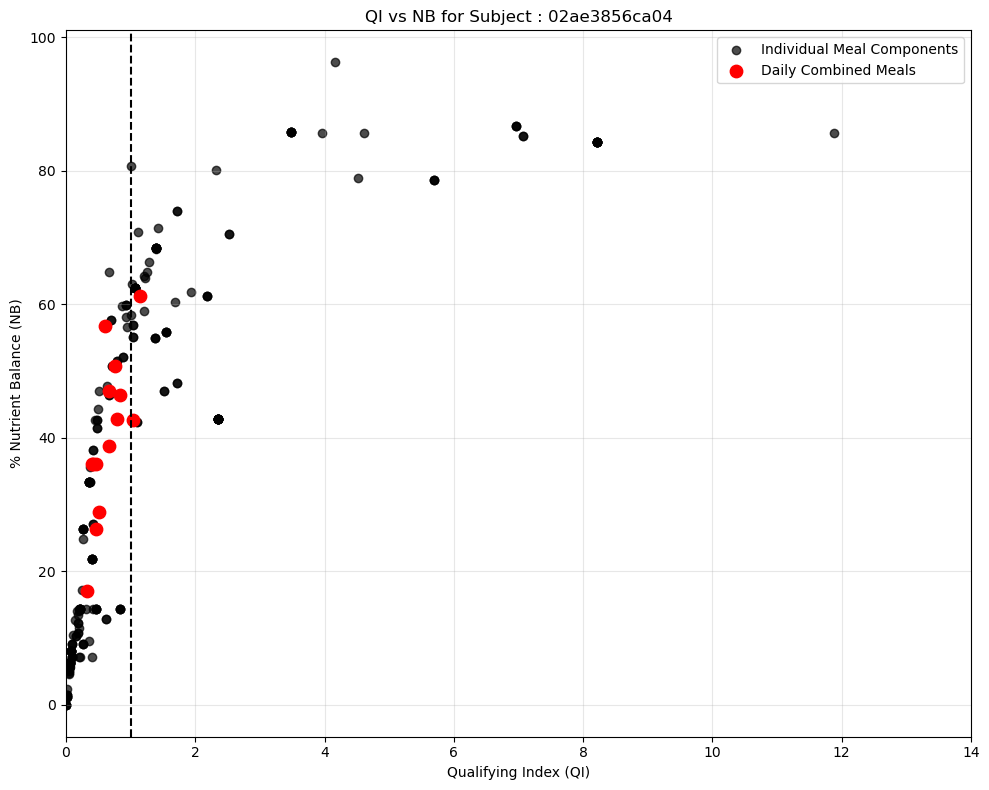

          date        QI         NB
0   2018-11-26  0.467519  26.346008
1   2018-11-27  1.032265  42.713951
2   2018-11-28  0.467519  36.044188
3   2018-11-29  0.417497  36.044188
4   2018-11-30  0.659438  38.768530
5   2018-12-01  0.673187  47.057553
6   2018-12-02  0.752033  50.686705
7   2018-12-03  0.833804  46.402644
8   2018-12-04  1.139287  61.234318
9   2018-12-05  0.796425  42.785547
10  2018-12-06  0.398094  36.044188
11  2018-12-07  0.608654  56.711733
12  2018-12-08  0.329572  17.041533
13  2018-12-09  0.507907  28.919594


In [93]:
subject_id = '02ae3856ca04'
start_date = pd.to_datetime('2018-11-26').date()
end_date = pd.to_datetime('2018-12-09').date()

plot_qi_nb_scatter(subject_id, df_food_scaled_copy, start_date, end_date)


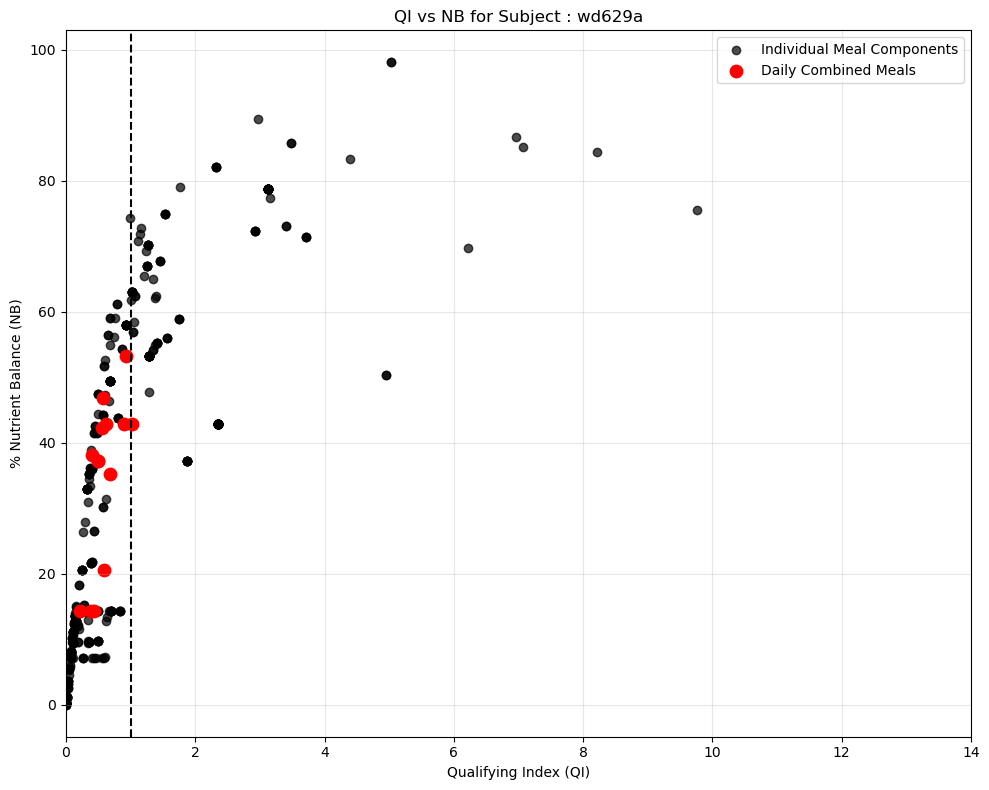

          date        QI         NB
0   2019-10-30  0.504011  37.209215
1   2019-10-31  0.504009  37.209215
2   2019-11-01  0.684815  35.253698
3   2019-11-02  0.398450  38.192191
4   2019-11-03  0.577516  46.855053
5   2019-11-04  0.929247  53.310040
6   2019-11-05  0.560089  42.207701
7   2019-11-06  0.583371  20.565149
8   2019-11-07  0.433528  14.285714
9   2019-11-08  0.382498  14.285714
10  2019-11-09  1.029670  42.857143
11  2019-11-10  0.215476  14.285714
12  2019-11-11  0.897169  42.857143
13  2019-11-12  0.612510  42.857143


In [94]:
subject_id = 'wd629a'
start_date = pd.to_datetime('2019-10-30').date()
end_date = pd.to_datetime('2019-11-12').date()

plot_qi_nb_scatter(subject_id, df_food_scaled_copy, start_date, end_date)

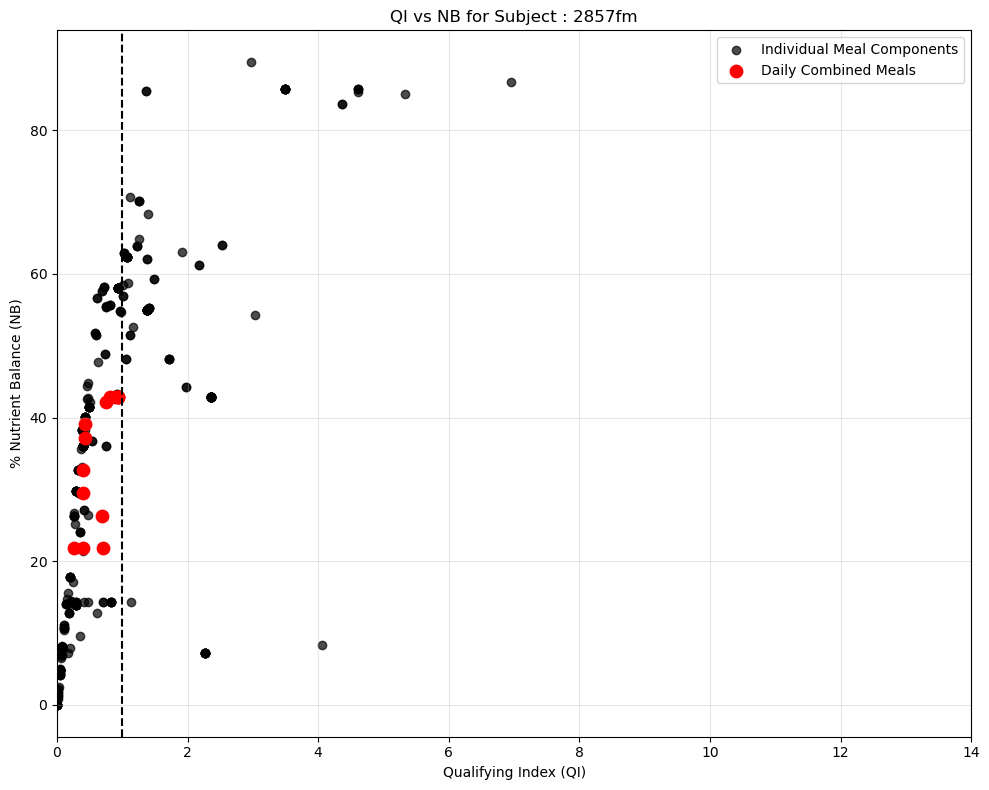

          date        QI         NB
0   2019-10-01  0.929247  42.857143
1   2019-10-02  0.881525  42.857143
2   2019-10-03  0.929247  42.857143
3   2019-10-04  0.398094  32.707453
4   2019-10-05  0.425447  39.150760
5   2019-10-06  0.263460  21.795000
6   2019-10-07  0.693246  26.346008
7   2019-10-08  0.929247  42.857143
8   2019-10-09  0.699990  21.795000
9   2019-10-10  0.750240  42.132577
10  2019-10-11  0.398094  29.420957
11  2019-10-12  0.816500  42.857143
12  2019-10-13  0.428085  37.118189
13  2019-10-14  0.398450  21.795000


In [95]:
subject_id = '2857fm'
start_date = pd.to_datetime('2019-10-01').date()
end_date = pd.to_datetime('2019-10-14').date()

plot_qi_nb_scatter(subject_id, df_food_scaled_copy, start_date, end_date)

## Descriptive statistics by nutrient (comparing food group)

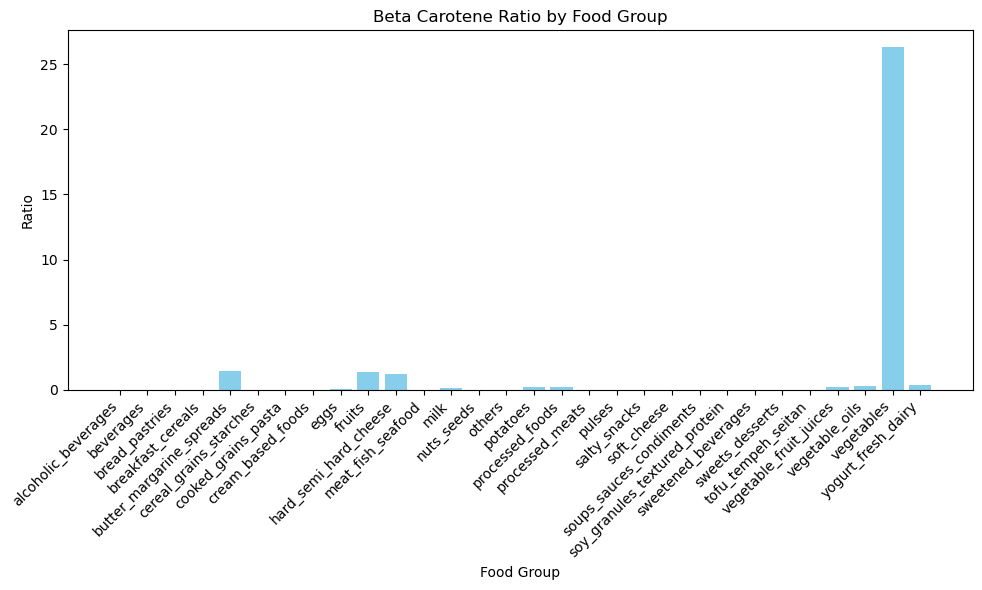

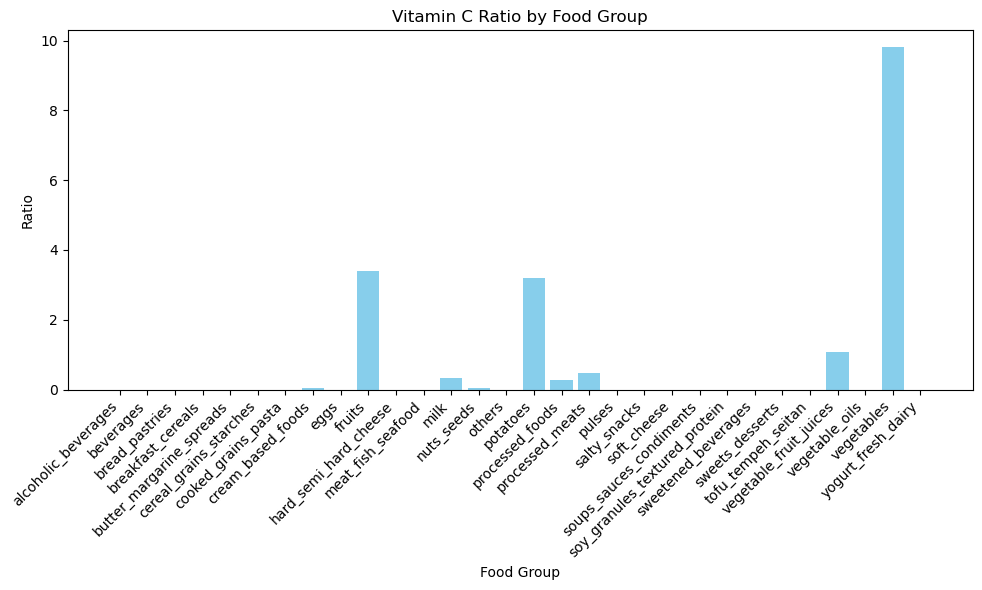

In [96]:
# Compute median beta_carotene_eaten_ratio for each food group
beta_caroten = df_food_scaled_copy.groupby('food_group')['beta_carotene_eaten_ratio'].median().reset_index()
vitamin_c = df_food_scaled_copy.groupby('food_group')['vitamin_c_eaten_ratio'].median().reset_index()

plt.figure(figsize=(10,6))
plt.bar(beta_caroten['food_group'], beta_caroten['beta_carotene_eaten_ratio'], color='skyblue')
plt.xlabel('Food Group')
plt.ylabel('Ratio')
plt.title('Beta Carotene Ratio by Food Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.bar(vitamin_c['food_group'], vitamin_c['vitamin_c_eaten_ratio'], color='skyblue')
plt.xlabel('Food Group')
plt.ylabel('Ratio')
plt.title('Vitamin C Ratio by Food Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [97]:
qi_ratios[qi_ratios['food_group'] == 'vegetables'].describe().T

,count,mean,std,min,25%,50%,75%,max
folate_eaten_ratio,47567.0,6.505492,6.811440,0.00,2.063492,5.000000,7.500000,61.764706
all_trans_retinol_equivalents_activity_eaten_ratio,47567.0,0.014187,0.150252,0.00,0.000000,0.000000,0.000000,1.696429
beta_carotene_eaten_ratio,47567.0,117.647860,172.341139,0.00,0.124224,26.302521,225.555556,669.387755
vitamin_c_eaten_ratio,47567.0,19.861593,28.749653,0.00,2.596491,9.803922,26.158730,145.641026
vitamin_d_eaten_ratio,47567.0,0.741475,4.043387,0.00,0.000000,0.000000,0.000000,57.777778
vitamin_e_activity_eaten_ratio,47567.0,2.852257,4.320873,0.00,0.492754,1.754386,4.444444,52.307692
calcium_eaten_ratio,47567.0,2.159780,2.194685,0.00,0.701754,1.481481,3.217391,18.823529
iron_eaten_ratio,47567.0,2.565025,3.164225,0.00,0.666667,1.388889,3.584229,111.111111
magnesium_eaten_ratio,47567.0,2.887121,2.809662,0.00,1.381579,2.232143,4.166667,60.096154
phosphorus_eaten_ratio,47567.0,3.308566,2.550166,0.00,1.954887,2.490842,5.079365,106.593407
